# Finding Strong MTG Decks

Created: 01/07/19 by Tom Lever
<br>
Updated: 04/26/19 by Tom Lever

## Abstract

Magic the Gathering is a beautiful and complex trading card game, for children and adults alike, based on casting spells and either outlasting or defeating one or more opponents. There is a definite mystical and nostalgic atmosphere to the game, and in fact Magic cards are designed to share mechanics and flavors that reflect stories. Magic the Gathering Arena, an internet-based gameplay environment released in Fall 2018, makes playing Magic accessible and captivating, and does an excellent job performing and animating a vast number of intricately related actions. Given how complex playing Magic is and, by extension, how difficult it is to create strong Magic decks, I wrote software that creates strong decks based on gatherer.wizards.com's cards database, mtgarena.pro's deck database, and my own rules-text categories database. In this paper I present my software process and results. A strong deck list involving "Forest" and “Plains” cards generated by my software won 2 out of 3 games in the “Ranked” mode of MTG Arena at "Gold Tier 3".

## 1. Motivation

At the most basic level, a game of Magic the Gathering involves two players. Each player begins the game with twenty life points. Each player shuffles their own library of sixty cards and draws a seven-card hand. Players alternate in taking turns. A player's turn consists of a beginning phase, a pre-combat main phase, a combat phase, a post-combat main phase, and an ending phase. Each phase consists of one or more steps. During a main phase of the active player (i.e., the player whose turn it is), the active player may convert a land card in their hand into a land permanent on the battlefield under their control. During any phase, under certain conditions, a player may tap land permanents for the rest of their turn to create mana that can be used within the present step in a process of casting spells. Some spells cast by the active player, usually cast during a main phase of the active player, result in the creation of creature permanents on the battlefield under the caster's control. During the active player's combat phase, the active player often taps one or more creatures to have them attack the other player. During the active player's beginning phase, the active player usually resets tapped permanents to an untapped state and draws a card. During the ending phase, the game automatically performs some actions.

What makes Magic such an engaging game is how players and their permanents interact. On a basic level, players can cast some spells, activate some abilities of permanents, and take some other actions, like blocking attacks, during others' turns. On a more interesting level, players have many opportunities during each other's turns to cast spells and activate abilities to negate attacks, strengthen their own creatures or incapacitate others' creatures, better themselves and harm their opponents, and prepare for future turns. On an advanced level, some permanents even have abilities that are triggered automatically when certain events occur, which then allow for other abilities and spells to be activated, triggered, or cast, often resulting in cascades of abilities and spells. The number of interactions, number of cards that may be included in libraries, and the memorable flavors of Magic cards make for complex and beautiful gameplay that rather well imitates what I believe to be a widely held, romantic image of mage battles.

The complexity of Magic the Gathering, while rewarding and captivating, makes learning to play Magic and constructing libraries rather difficult. In this paper, I present software to aid in creating strong decks. My software should be of interest to any regular Magic player who has ever been frustrated by the complexity and open-endedness that I believe is inherent in constructing Magic decks.

## 2. Datasets

My software for developing strong MTG decks relies on three main datasets. The first is a database of information on 1,617 cards in the Ixalan, Rivals of Ixalan, Dominaria, Core Set 2019, Guilds of Ravnica, and Ravnica Allegiance card sets that I created using information from https://gatherer.wizards.com/.

My second main dataset is a database of card names, win / loss ratios, and card counts associated with 2,271 proven decks (proven by virtue of having win / loss ratios) ensured to have sixty cards. I created this database using information from https://mtgarena.pro/decks/?community/.

My third main dataset is my own rules-text categories database, which classifies each card in a condensed version of the cards database into one or more of fifty categories based on the content of that card's rules text.

## 3. Data Preparation and Cleaning

To prepare my cards database for analysis, I created a condensed cards database by deleting rows from my cards database with the same name, except the first row. The clearest application of this is aggregating basic land cards found in multiple card sets into one basic land card in one set. This aggregation was an automatic process. The condensed database has 1,546 cards. I also manually adjusted the mana types of lands from being all "Colorless" to being "Colorless", associated with one specific mana type, associated with two mana types, or associated with any mana type. The rarities for the five basic land cards is “Land” so that the basic lands appear at the top of the best-cards database when the best-cards database is sorted first by rarity and then by total number of occurrences. The condensed cards database is used first to create a best-cards database.

Constructing a name x ratio database required locating information on 4,827 decks, then scraping together information on 2,412 proven decks, then extracting information on 2,271 decks ensured to have sixty cards, then creating a table of mtgarena.pro card ID numbers and card names in those 2,271 decks, then creating a ID / name x location / win ratio database filled in with card counts, then aggregating rows by name in and eliminating the ID column and location row from the ID / name x location / win ratio database. Creating the name x ratio database took a lot of prep work and it was a little difficult to reload this table once saved to a CSV file due to duplicate column headers.

## 4. Research Question

The fundamental research question that I answered using my software was, “What is a strong deck of sixty nonland cards where all the cards:
<ol>
    <li>Are in my MTG-Arena inventory;
    <li>Have mana costs in a certain grouping [e.g., (“C”, “F”, "P", "CF", "CP", "FP", “CFP”)];
    <li>Each belong to one or more categories in a grouping of categories associated with a high win / loss ratio [e.g., (“create creature token or convert lands into creatures”, "destroy", "draw", "put nonland card", "flying")];
    <li>Are balanced so that more important categories have higher proportions of cards; and
    <li>Have a maximum average converted mana cost less than a certain user-defined maximum [e.g., 3.001]?"
</ol>

## 5. <a id="tasks_checklist"></a>Summary of Methods

My software, executed one module at a time, completes the tasks in the below checklist.

<ol>
    <li style="margin-bottom:32px;"><a href="#condensing_cards_database">Condense cards database</a> by deleting rows with the same name, except the first row. The clearest application of this is aggregating basic land cards found in multiple card sets into one basic land card in one set. My condensed database has 1,546 cards. The condensed cards database will be used first to create a best-cards database. After condensing the cards database, I manually adjusted the mana types of lands from being all "Colorless" to being "Colorless", associated with one mana type, associated with two mana types, or associated with any mana type.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_raw_table_of_deck_URLs_and_any_win_loss_ratios">Create a raw table of deck URL's and any win ratios</a>. The URL's are to information on 4,827 proven or unproven decks read from https://mtgarena.pro/decks/?community/. A URL may not have a corresponding win ratio. A cleaned table will be created using this raw table.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_cleaned_table_of_deck_URLs_and_win_loss_ratios">Create a cleaned table of URL's and win ratios</a>. The URL's are to information on 2,412 proven decks read from https://mtgarena.pro/decks/?community/ and the win / loss ratios corresponding to those decks. The URL's will be used first to archive information on each deck to its own text file. The win / loss ratios will be used first to create a winnowed table of URL's and win / loss ratios for decks ensured to have sixty cards.
        <br>
    <li style="margin-bottom:32px;"><a href="#archiving_information_on_each_proven_deck">Archive information on each of 2,412 proven decks</a> in its own text file in a folder of files of deck information. A similar archive will be created from this archive for information on each of 2,271 decks ensured to have sixty cards. 
        <br>
    <li style="margin-bottom:32px;"><a href="#archiving_information_on_sixty-card_decks_and_winnowing_cleaned_table_of_URLs_and_ratios">Archive information on sixty-card decks and create a winnowed cleaned table of URLs and ratios.</a> The archived information will be used first to create a table of card ID numbers and names of cards in each deck ensured to have sixty cards. The winnowed cleaned table of URLs and ratios will be used first as the multirow header of a (card ID / card name) $\times$ (deck URL / win/loss ratio) database.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_table_of_card_ID_numbers_and_names">Create a table of card ID numbers and names.</a> Each (ID number, name) pair will correspond to one card in at least one of the 2,271 decks ensured to have sixty cards. Each (ID number, name) pair in the table will be unique. The ID numbers and names for cards in each deck are found in the BeautifulSoup for that deck. Unfortunately, different ID numbers may have the same card name. I handle this by aggregating rows with the same card name in the (card ID / card name) $\times$ (deck URL / win/loss ratio) database. This table of ID numbers and names will be used first in the multicolumn index of the (card ID / card name) $\times$ (deck URL / win/loss ratio) database.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_card_ID_card_name_x_deck_url_win_loss_ratio_database">Create a (card ID / card name) $\times$ (deck URL / win/loss ratio) database.</a> A condensed database without MTGArena.pro ID numbers, without deck-page URL's, and with rows aggregated by name will be created using this database.
        <br>
    <li style="margin-bottom:32px;"><a href="#Creating_a_name_x_ratio_database">Create a name $\times$ ratio database.</a> MTGArena.pro ID numbers will be eliminated, URL's will be eliminated, and rows will be aggregated by name. The condensed database will be used first to create a table of card names, total numbers of occurrences, and average frequencies of cards in 2,271 decks.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_table_of_card_names_total_occurrences_and_frequencies">Create a table of card names, total occurrences, and frequencies.</a> The table will be used first to create a best-cards database.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_best_cards_database">Create a best-cards database.</a> A best-cards database with an inventory column will be created using the best-cards database.
        <br>
    <li style="margin-bottom:32px;"><a href="#creating_a_best_cards_database_with_inventory">Create a best-cards database with inventory.</a> The inventory column of this database will be filled in from an inventory database by an Excel VBA module. The best-cards database will be sorted first by rarity and second by total number of occurrences in 2,271 decks. This database will be filtered into strong decks.
        <br>
    <li style="margin-bottom:32px;"><a href="#find_average_win_ratios_of_decks_with_mana_types_in_specific_groupings">Find average win ratios of decks with mana types in specific groupings.</a> The groupings and average win ratios will be output to this notebook. To satisfy my desires to enjoy play and to play competitively, I will filter the best-cards database with inventory into a strong deck with mana types corresponding to a flavor that I enjoy playing and corresponding to a grouping with a high average win ratio.
        <br>
    <li style="margin-bottom:32px;"><a href="#develop_rules_text_categories_database">Develop rules text categories database.</a> My rules text categories database classifies every card in the condensed cards database as belonging to one or more of fifty categories based on the content of the card's rules text. A categories of interest database will be created using this database.
        <br>
    <li style="margin-bottom:32px;"><a href="#develop_categories_of_interest_database">Develop categories of interest database.</a> My categories of interest database classifies every card in the condensed cards database into one or more of half a dozen to a dozen categories of interest. When I only had half of the rules text categories database filled in, I used the below machine-learning techniques to fill in the second half of the appropriate categories of interest columns. When Wizards of the Coast publishes a new card set, I will be able to use the below machine-learning techniques to guess at how the new cards may be assigned to my fifty categories. Regardless of whether or not I am using my machine-learning program to fill in the categories of interest database, I will create a filled-in categories of interest database using the categories of interest database.
        <br>
    <li style="margin-bottom:32px;"><a href="#fill_categories_of_interest_database">Fill in categories database</a> by saving a copy of "Categories_of_Interest.csv" as "Filled_In_Categories_Database.csv" or by using a machine-learning program. A filtered filled-in categories database will be created using this database.
        <br>
    <li style="margin-bottom:32px;"><a href="#filter_filled_in_categories_database">Filter filled in categories database</a> by mana type and availability. This database will be used to find the highest average win ratios for all combinations of categories in the filled-in categories database.
        <br>
    <li style="margin-bottom:32px;"><a href="#determine_highest_average_win_loss_ratios_for_combinations_of_categories">Determine highest average win / loss ratios for combinations of categories.</a> For each possible number of unique cards in a deck that each happen to be in at least one category in a grouping, the win / loss ratios of all decks with that number of unique cards in categories are averaged. The highest average win / loss ratio assigned to a grouping of categories is the highest average win / loss ratio among average win / ratios for different numbers of unique cards in categories.
        <br>
    <li style="margin-bottom:32px;"><a href="#weight_categories_in_a_chosen_grouping">Weight categories in a chosen grouping.</a>
        <br>
    <li style="margin-bottom:32px;"><a href="#develop_strong_deck_list_with_specific_mana_types_categories_and_max_ave_CMC">Develop a strong deck list with specific mana types, rules-text categories, and maximum average converted mana cost.</a> The mana types were specified in the program that filtered the filled-in categories database. The rules-text categories were specified in the program that developed the categories of interest database. The maximum average converted mana cost is defined in this program. I start of with an unrealistically high max ave CMC (i.e., 12). I vary the max ave CMC based on whether I feel that gameplay with the base unconstrained deck is too "slow" / "heavy". I am interested in whether constrained decks out-perform unconstrained decks. This strong deck list will be used to play enjoyable and competitive games.
</ol>

## 6. Walking through Software Solutions to Checklist Tasks

### 6.1. <a id="condensing_cards_database"></a>Condensing Cards Database

<a href="#tasks_checklist">Return to Tasks Checklist</a>

A Magic card may be converted into a land permanent; used to cast instant and sorcery spells; or converted into an artifact, creature, artifact creature, enchantment, or planeswalker permanent. Each Magic cards has a name. Each nonland card has a mana cost, which indicates the number and types of land permanents that must be tapped to use that card. Each cards has a high-quality illustration taking up roughly half the card. Each card has a type, and many cards have subtypes. Each card has a set icon, which is filled with one of four colors to indicate rarity. Each instant or sorcery card has rules text that indicates spell effects. Each permanent card has rules text that indicates triggered abilities, or activated abilities and their costs. Each creature card has a power indicator and a toughness indicator, and each planeswalker card has a loyalty indicator.

I wrote the below Python program to create a condensed cards database to information on 1,546 cards in my cards database. Rows with the same card information except card set are aggregated. I would like to note that in my original cards database I initially set all lands to have a mana type of Colorless, given that their mana costs are 0. After condensing the cards database, I manually adjusted all land mana types in the condensed cards database to one of "C", "F", "I", "M", "P", "S", "FI", "FM", "FP", "FS", "IM", "IP", "IS", "MP", "MS", "PS", or "Any". Please see below screenshot of the condensed cards database.

My program requires the path to my initial cards database. My program relies on the pandas Python library for reading, aggregating, and writing. My program outputs the condensed cards database to "Condensed_Cards_Database.csv" in the "Data_With_Ravnica_Allegiance" subfolder to this notebook's folder.

<img src="6-1--Screenshot--Condensed_Cards_Database.png">
<br>
<center><b>Figure 1:</b> Screenshot of "Condensed_Cards_Database.csv"</center>

In [3]:
# Condensing_Cards_Database.py
#
# Created: 03/21/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# This program condenses the cards database by deleting rows with the same name, except the first row.
# I manually assigned mana types for lands.
#
# Inputs: Cards_Database.csv
# Dependencies: pandas
# Outputs: Condensed_Cards_Database.csv


# Allow use of the pandas.read_csv method.
import pandas as pd


# Load cards database from file into a pandas DataFrame.
cards_database = pd.read_csv("Cards_Database.csv", header=0, index_col=0)

# Drop duplicate rows.
condensed_cards_database = cards_database[~cards_database.index.duplicated(keep="first")]

# Write the condensed cards database to file.
condensed_cards_database.to_csv("Condensed_Cards_Database.csv")

### 2.2. <a id="creating_a_raw_table_of_deck_URLs_and_any_win_loss_ratios"></a>Creating a Raw Table of Deck URL's and Any Win / Loss Ratios

<a href="#tasks_checklist">Return to Tasks Checklist</a>

#### 2.2.1. Task, Software, and Result

I wrote the below Python program to create a raw table of URL's to information on 4,827 proven or unproven decks read from https://mtgarena.pro/decks/?community/ and any win / loss ratios corresponding to those decks. A cleaned table will be created from this raw table. Please see the below image for what my raw table of URL's and win / loss ratios looks like.

My program requires no inputs. My program depends on using the Selenium toolset to automate Google Chrome in scrolling through a webpage of dynamically loaded deck information living at http://mtgarena.pro/decks/?community/. My program depends on using the time Python module to put itself to sleep for six seconds after each scroll to give the webpage sufficient time to load new data and, actually, all previous data as well. My program depends on using the BeautifulSoup Python library to structure HTML representing the webpage. My program relies on the re Python module to find deck ID numbers. My program outputs my raw table of deck URL's and any win / loss ratios to "URLs_n_Ratios.csv" in the "Data_With_Ravnica_Allegiance" subfolder to this notebook's folder.

<img src="6-2--Screenshot--URLs_and_Win_Loss_Ratios.png">
<br>
<center><b>Figure 2:</b> Screenshot of "URLs_n_Ratios.csv"</center>

In [7]:
# Creating_a_Raw_Table_of_Deck_URLs_and_Any_Win-Loss_Ratios.py
#
# Created: 01/07/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# This program records the dynamically loaded HTML of MTGArena.pro/decks/?community/,
# a webpage presenting introductory information for at least 4,827 MTG decks.
# The program then creates a table of deck URL's and win / loss ratios.
#
# Inputs: None
# Dependencies: selenium.webdriver, time, bs4.BeautifulSoup, re
# Outputs: URLs_n_Ratios.csv,
# which contains a 4,828 x 2 table. One row is the table header.


# Allow creation of webdriver class instances.
from selenium import webdriver

# Allow use of the time.sleep method.
import time

# Allow creation of BeautifulSoup class instances.
from bs4 import BeautifulSoup

# Allow use of the re.compile method.
import re


########################################################################
# Extract the dynamically loaded HTML of MTGArena.pro/decks/?community/.
########################################################################

# Open a Chrome browser.
browser = webdriver.Chrome()

# Navigate to the webpage.
browser.get("https://mtgarena.pro/decks/?community")

# Initialize last_height as the webpage's present scroll height.
last_height = browser.execute_script("return document.body.scrollHeight")

# Set a time for the program to sleep between scrolls to allow for the webpage to load.
sleep_time  = 6

while True:
    
    # Scroll down to bottom of the body.
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load page.
    time.sleep(sleep_time)
    
    # Calculate new scroll height.
    new_height = browser.execute_script("return document.body.scrollHeight")
    
    # If new scroll height equals last scroll height,
    # then the webpage hasn't loaded any more information,
    # and it's time to end the scrolling.
    if new_height == last_height:
        break
    
    # If the webpage loaded information, then set the last height to the new height.
    last_height = new_height

# Extract the HTML representing the fully loaded webpage.
inner_HTML = browser.execute_script("return document.body.innerHTML")

# Close the browser.
browser.close()


#############################################################
# Write each deck URL and win / loss ratio in the loaded HTML
# into a table in a CSV file.
#############################################################

# Parse the loaded HTML into a BeautifulSoup.
soup = BeautifulSoup(inner_HTML, "html.parser")

# Open a CSV file for writing. 
f = open("./Data_With_Ravnica_Allegiance/URLs_n_Ratios.csv", "w", encoding="utf-8")

# Write table headers to the CSV file.
f.write("Deck-Page URL" + "," + "Win / Loss Ratio" + "\n")

# For each division block in the BeautifulSoup
# that has an ID containing "deckxx" and that
# represents a deck...
for div in soup.findAll('div', id=re.compile('deckxx')):
    
    # Find the URL associated with that deck.
    deck_url = "https://mtgarena.pro" + div.find('a')['href']
    
    # Find the win ratio associated with that deck.
    win_ratio = (div.contents)[5].text
    if win_ratio != "??":
        win_ratio = float(win_ratio[:-1])
    
    # Write the deck URL and deck win ratio to the CSV file.
    f.write(deck_url + "," + str(win_ratio) + "\n")

# Close the file.
f.close()

#### 2.2.2. Ensuring the Best Result

<i>This section applies to data loaded by the above program when https://mtgarena.pro/decks/?community/ only listed decks containing cards from the Ixalan, Rivals of Ixalan, Dominaria, Core Set 2019, and Guilds of Ravnica card sets. I believe that sometime around 03/01/19, a month or so after the Ravnica Allegiance card set was added to MTG Arena, MTGArena.pro reset its community decks listing.</i>

I wrote the below Python program to ensure that I would not gain significantly more URL's and win ratios than 13,854 if I changed the sleep time between scrolls through the http://mtgarena.pro/decks/?community/ webpage from 5 seconds to 6 seconds. My program generates a graph showing a logarithmic relationship between number of URL's recorded (in HTML) and total sleep time (the product of sleep time per scroll and the number of sleeps before the program above didn't sleep long enough). You can see below that there is a relatively minute difference in numbers of decks recorded for total sleep times of 24 minutes, 31 minutes, and 39 minutes.

My program requires information on the number of URL's recorded in HTML for each sleep time per scroll. My program depends on using the numpy Python package to organize this information. My program depends on using the matplotlib.pyplot Python interface to graph "Number of URL's Recorded vs. Total Sleep Time". My program ouputs this graph in this notebook.

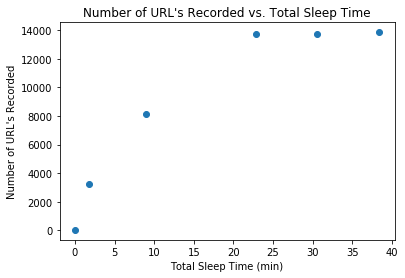

In [1]:
# Graph_Num_URLs_Recorded_vs_Total_Sleep_Time.py
#
# Created: 01/??/19 by Tom Lever
# Updated: 03/19/19 by Tom Lever
#
# This program graphs the number of URL's recorded in HTML versus total sleep time.
# This graph is useful in determining that having a sleep time per load of 5 seconds
# is about the maximum sleep time per load that I want, given that I can extrapolate
# that there won't be too much more gain in URL's for larger sleep times per scroll.
#
# Inputs: Array of numbers of URL's recorded for six runs of the program above,
# each with a unique sleep time per scroll.
# Dependencies: numpy, matplotlib.pyplot
# Outputs: Graph of Number of Decks Recorded vs. Total Sleep Time


# Allow creation of ndarrays.
import numpy as np

# Allow use of matplotlib.pyplot scatter-plotting and labeling methods.
import matplotlib.pyplot as plt


#####################################################################
# Assemble arrays for number of decks loaded vs. sleep times to load.
#####################################################################

# Create an ndarray of the number of URL's recorded for each run.
nums_URLs_recorded = np.array([30, 3240, 8130, 13737, 13763, 13854])

# Calculate the total sleep time corresponding to each number of URL's recorded.
total_sleep_times = np.zeros(nums_URLs_recorded.shape[0])
decks_added_per_scroll = 30
seconds_per_minute = 60
for i in range(0, nums_URLs_recorded.shape[0]):
    total_sleep_times[i] = i*(nums_URLs_recorded[i]/decks_added_per_scroll - 1)*(1/seconds_per_minute)


##############################################################################
# Graph Number of Decks Loaded vs. Minutes of Sleeping Before Loading Failure.
##############################################################################

# This magic function is apparently important
# in getting the scatter plot to show in Jupyter Notebook.
# The ordering of the following three code blocks is important.
%matplotlib inline

plt.scatter(total_sleep_times, nums_URLs_recorded)
plt.xlabel("Total Sleep Time (min)")
plt.ylabel("Number of URL's Recorded")
plt.title("Number of URL's Recorded vs. Total Sleep Time")

# This function is important in getting the scatter plot
# to show without scatter-plot object information.
plt.show()

### 2.3. <a id="creating_a_cleaned_table_of_deck_URLs_and_win_loss_ratios"></a>Creating a Cleaned Table of Deck URL's and Win / Loss Ratios

<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to create a cleaned table of URL's to information on 2,412 proven decks read from https://mtgarena.pro/decks/?community/ and the win / loss ratios corresponding to those decks. The URL's will be used first to archive information on each deck to its own text file. The win / loss ratios will be used first in a table of deck URL's and win / loss ratios corresponding to decks ensured to have sixty cards. Please see the below screenshot of the cleaned table of URL's and ratios.

My program requires the path of my generated raw table of URL's and win / loss ratios. My program depends on using the pandas Python library to load the raw table and to eliminate all rows with the value of "??", instances of which I translate into "NaN". My program depends on using the numpy Python package to replace all instances of "??" with "NaN". My program outputs my cleaned table of deck URL's and win / loss ratios to "URLs_n_Ratios--Cleaned.csv" in the "Data_With_Ravnica_Allegiance" subfolder to this notebook's folder.

<img src="6-3--Screenshot--URLs_and_Win_Loss_Ratios--Cleaned.png">
<br>
<center><b>Figure 3:</b> Screenshot of "URLs_n_Ratios--Cleaned.csv"</center>

In [5]:
# Creating_a_Cleaned_Table_of_Deck_URLs_and_Win-Loss_Ratios.py
#
# Created: 01/09/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# This program generates a version of "URLs_n_Ratios.csv" with rows with no win ratios removed.
#
# Inputs: "URLs_n_Ratios.csv"
# Dependencies: pandas, numpy
# Outputs: "URLs_n_Ratios--Cleaned.csv",
# which contains a 2,413 x 2 table. One row is the table header.


# Allows using the read_csv, dropna, and to_csv methods.
import pandas as pd

# Allows replacing "??" with NaN.
import numpy as np


################################################################################
# Read and manipulate the raw table of deck URL's and win ratios as a dataframe.
################################################################################

# Reads the raw table of deck URL's and win ratios into a dataframe.
deck_URLs_and_win_ratios = pd.read_csv("./Data_With_Ravnica_Allegiance/URLs_n_Ratios.csv", header=0, index_col=0)

# Replaces all win ratios of "??" with NaN.
table_with_quest_marks_replaced = deck_URLs_and_win_ratios.replace("??", np.nan)

# Removes rows with values of NaN.
table_with_NaNs_dropped = table_with_quest_marks_replaced.dropna()


###########################################################
# Write the cleaned deck-page URL's and win ratios to file.
###########################################################

table_with_NaNs_dropped.to_csv("./Data_With_Ravnica_Allegiance/URLs_n_Ratios--Cleaned.csv")

### 2.4. <a id="archiving_information_on_each_proven_deck"></a>Archiving Information on Each Proven Deck

<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to load the webpage for each of the 2,412 proven decks and to download the HTML representing the loaded webpage into a text file corresponding to that deck. A set of 2,271 text files will be created from the set of 2,412 text files. Each text file in the set of 2,271 is ensured to correspond to a sixty card deck and to contain no sideboard information. Please see below screenshot of the folder of deck-page HTML's for each of the 2,412 proven decks.

My program requires the path of my cleaned table of URL's and win / loss ratios. My program depends on using the pandas Python library to load the cleaned table. My program depends on using the Selenium toolset to automate Google Chrome in loading webpages of deck information. My program outputs a folder of "Deck-Page_HTMLs" in the "Data_Pre_Ravnica_Allegiance" subfolder of this notebook's folder.

<img src="6-4--Screenshot--Deck-Page_HTMLs.png" width=50%></td>
<br>
<center><b>Figure 4:</b> Screenshot of "./Data_With_Ravnica_Allegiance/Deck-Page_HTMLs"</center>

In [15]:
# Archiving_Information_on_Each_Proven_Deck.py
#
# Created: 01/??/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# This program reads the series of URL's from "URLs_n_Ratios--Cleaned.csv"
# and archives into a common folder text files containing the HTMLs
# representing the web pages accessed via each URL.
#
# Inputs: URLs_n_Ratios--Cleaned.csv
# Dependencies: pandas, selenium.webdriver
# Outputs: 2,412 text files containing HTMLs


# Allow use of the pd.read_csv method.
import pandas as pd

# Allow creation of a webdriver class instance.
from selenium import webdriver


# Read the URLs from "URLs_n_Ratios--Cleaned.csv" into a pandas series.
urls = pd.read_csv("./Data_With_Ravnica_Allegiance/URLs_n_Ratios--Cleaned.csv")["Deck-Page URL"]

# Open a Chrome browser.
browser = webdriver.Chrome()

# For each MTG deck...
for i in range(0, len(urls)):

    # Open a text file to store the HTML representing the web page for that deck.
    f = open("./Data_With_Ravnica_Allegiance/Deck-Page_HTMLs/Deck-Page_HTML--" + str(i) + ".txt", "w", encoding="utf-8")
    
    # Navigate to a webpage via the URL.
    browser.get(urls[i])
    
    # Extract the loaded HTML of the web page and add it to the file.
    f.write(browser.execute_script("return document.body.innerHTML"))
    
    # Close the file.
    f.close()
    
# Close the browser.
browser.close()

### 2.5. <a id="archiving_information_on_sixty-card_decks_and_winnowing_cleaned_table_of_URLs_and_ratios"></a>Archiving Information on Sixty-Card Decks and Winnowing Cleaned Table of URLs and Ratios

<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to archive information on each deck ensured to have sixty cards, and to create a version of "URLs_n_Ratios--Cleaned.csv" that lists URLs to and win ratios for decks ensured to have sixty cards. The program ensures each deck has exactly sixty cards by finding a "60 / 60" string in the deck's HTML. The program additionally ensures that it does not confuse sideboard cards with deck cards by eliminating, for each deck, all text mentioning sideboard and all text thereafter. The archive will be used first to create a list of ID numbers and names for cards in the 2,271 decks. The winnowed table of URLs and ratios will be used first as the multirow header of the (card ID / card number) $\times$ (deck URL / win/loss ratio) database. Please see below screenshots of the folder of deck-page HTML's for each of the 2,271 decks ensured to have sixty cards, and of "Winnowed_URLs_n_Ratios.csv".

My program requires the path of my cleaned table of URL's and win / loss ratios. My program depends on using the pandas Python library to load the cleaned table. My program depends on using the re Python module to find all text before sideboard-related text. My program outputs a folder of deck-page HTMLs corresponding to sixty-card decks and "Winnowed_URLs_n_Ratios.csv" in the "Data_With_Ravnica_Allegiance" subfolder of this notebook's folder.

<table>
    <tr>
        <td><img src="6-5-1--Screenshot--Winnowed_Deck-Page_HTMLs.png"></td>
        <td><img src="6-5-2--Screenshot--Winnowed_URLs_n_Ratios.png"></td>
    </tr>
    <tr></tr>
    <tr>
        <td><center><b>Figure 5.1:</b> Screenshot of "./Data_With_Ravnica_Allegiance/HTMLs--60--Before_Sideboards"</center></td>
        <td><center><b>Figure 5.2:</b> Screenshot of "Winnowed_URLs_and_Ratios.csv"</center></td>
    </tr>
</table>

In [ ]:
# Archiving_Information_on_Sixty-Card_Decks_and_Winnowing_URL_and_Win-Loss_Ratio_Table.py
#
# Created: 01/16/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# This program reads each Deck-Page_HTML-- file and
# creates a version of that file, if that file has a 60-card deck,
# with HTML before the sideboard, if a sideboard exists,
# or all the HTML, if a sideboard does not exist.
#
# This program also winnows "URLs_n_Ratios--Cleaned.csv" to "Winnowed_URLs_n_Ratios.csv",
# which contains a table of URLs and ratios corresponding to decks ensured to have sixty cards.
#
# Inputs: Deck-Page_HTML-- files, URLs_n_Ratios--Cleaned.csv
# Dependencies: pandas, re
# Outputs: 2,271 text files containing winnowed deck-page HTML's, and "Winnowed_URLs_n_Ratios.csv".
# Winnowed_URLs_n_Ratios contains a 5,391 x 2 table. One row is the table header.


# Allows use of the pandas.read_csv method.
import pandas as pd

# Allows use of the re.search method.
import re


# Read the cleaned URL / win ratio table into a dataframe. 
deck_urls_and_win_ratios = pd.read_csv("./Data_Pre_Ravnica_Allegiance/URLs_n_Ratios--Cleaned.csv")

# Enter the "Deck-Page URL" column into a list.
deck_urls = deck_urls_and_win_ratios["Deck-Page URL"].tolist()

# Enter the "Win / Loss Ratio" column into a list.
win_ratios = deck_urls_and_win_ratios["Win / Loss Ratio"].tolist()

# Create an empty list for recording the deck-page URL's for sixty-card decks.
winnowed_deck_urls = []

# Create an empty list for recording the win ratios for sixty-card decks.
winnowed_win_ratios = []


# Start a counter for appending to the end of each Deck-Page_HTML-- file corresponding to a sixty-card deck.
count = 0

# For each original Deck-Page_HTML-- file...
for i in range(0, 2411):
    
    # Read that original Deck-Page_HTML-- file in.
    f = open("./Data_With_Ravnica_Allegiance/Deck-Page_HTMLs/Deck-Page_HTML--" + str(i) + ".txt", "r", encoding="utf-8")
    deck_HTML = f.read()
    f.close()
    
    # If the present original Deck-Page_HTML-- file represents a 60-card deck...
    if "60 / 60" in deck_HTML:
        
        # Write the represented deck's URL into the list of deck URL's for sixty-card decks.
        winnowed_deck_urls.append(deck_urls[i])
        
        # Write the represented deck's win ratio into the list of win ratios for sixty-card decks.
        winnowed_win_ratios.append(win_ratios[i])
        
        # Open a new text file to contain this file exactly or a cropped version,
        # depending on whether or not the represented deck has a sideboard.
        f = open("./Data_With_Ravnica_Allegiance/HTMLs--60--Before_Sideboards/Deck-Page_HTML--" + str(count) + ".txt", "w", encoding="utf-8")
        
        # If the represented deck has a sideboard...
        if "dc_dhead\">Sideboard" in deck_HTML:
            
            # Crop the original deck file and write it into the new file.
            f.write("<div" + re.search("<div(.*)dc_dhead\">Sideboard", deck_HTML).group(1))
        
        # If the represented deck does not have a sideboard...
        else:
            
            # Write the original file representing a 60-card deck into the new file.
            f.write(deck_HTML)
        
        # Close the new file.
        f.close()
        
        # Increase the suffix for winnowed deck files by 1.
        count += 1


# Write the winnowed cleaned table of URL's and win ratios into a CSV file.
f = open("/Data_With_Ravnica_Allegiance/Winnowed_URLs_n_Ratios.csv", "w", encoding="utf-8")
f.write("Deck-Page URL" + "," + "Win / Loss Ratio" + "\n")
for i in range(0, len(winnowed_deck_urls)):
    f.write(winnowed_deck_urls[i] + "," + str(winnowed_win_ratios[i]) + "\n")
f.close()

### 2.6. <a id="creating_a_table_of_card_ID_numbers_and_names"></a>Creating a Table of Card ID Numbers and Names

<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to create a table of card ID numbers and names for each card in the 2,271 decks ensured to have sixty cards. Each (ID number, name) pair will correspond to one card in at least one of the 2,271 decks ensured to have sixty cards. Each (ID number, name) pair in the table will be unique. The ID numbers and names for cards in each deck are found in the BeautifulSoup for that deck. Unfortunately, different ID numbers may have the same card name. I handle this by aggregating rows with the same card name in the (card ID / card name) $\times$ (deck URL / win/loss ratio) database. This table of ID numbers and names will be used first in the multicolumn index of the (card ID / card name) $\times$ (deck URL / win/loss ratio) database. Please see below screenshot of the ID's and names table.

My program requires the path to the folder of information on the decks ensured to have sixty cards. My program depends on the BeautifulSoup Python library to structure the HTML information for each deck. My program depends on the re Python module to find card ID numbers within specific strings. My program outputs the table of ID's and names to "IDs_and_Names.csv" in the "Data_With_Ravnica_Allegiance" subfolder of this notebook's folder.

<img src="6-6--Screenshot--IDs_and_Names.png" width="25%">
<br>
<center><b>Figure 6:</b> Screenshot of "IDs_and_Names.csv"</center>

In [2]:
# Creating_a_Table_of_Card_ID_Nums_and_Names.py
#
# This program creates a list of unique card-ID-number / card-name element pairs across 2,271 decks.
#
# Created: 01/??/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# Inputs: Winnowed Deck-Page_HTML-- files
# Dependencies: bs4.BeautifulSoup, re
# Outputs: IDs_and_Names.csv,
# which contains a 1,351 x 2 table. One row is the header.


# Allow creation of BeautifulSoup class instances.
from bs4 import BeautifulSoup

# Allow use of the re.compile method.
import re


#############################################################################
# For each of 2,271 decks,
# extract from that deck's HTML card-ID-number / card-name element pairs, and
# add those element pairs to a running list of element pairs for all decks.
#############################################################################

# Initialize an empty list for card-ID-number / card-name element pairs.
list_of_element_pairs = []

# For each winnowed deck-page HTML...
for i in range(0, 2270):
    
    # Read that HTML into a string.
    f = open("./Data_With_Ravnica_Allegiance/HTMLs--60--Before_Sideboards/Deck-Page_HTML--" + str(i) + ".txt", "r", encoding="utf-8")
    deck_HTML = f.read()
    f.close()

    # Parse the loaded HTML into a BeautifulSoup.
    soup = BeautifulSoup(deck_HTML, "html.parser")
    
    # For each division block representing a card in the HTML for the card's web page...
    for div in soup.findAll('div', id=re.compile('indeckxx')):
        
        # Find the card's ID number.
        card_ID_num = int(div["id"].split("indeckxx")[1])
        
        # Find the card's title.
        card = div["title"].replace(",", "|")
        
        # Add to the list of card-ID-number / card-name element pairs
        # an element pair with the present card's ID number and name.
        list_of_element_pairs.append([card_ID_num, card])

        
#################################################################
# Create a list of unique element pairs sorted by card ID number.
# Write card numbers and card names to a CSV file.
#################################################################

# Create a list of unique element pairs.
list_of_unique_element_pairs = [list(v) for v in dict(list_of_element_pairs).items()]

# Sort the list of unique element pairs by card ID number.
sorted_list_of_unique_element_pairs = sorted(list_of_unique_element_pairs, key=lambda pair: pair[0])

# Extract unique, sorted card ID numbers from the sorted list of unique element pairs.
card_ID_nums = [col[0] for col in sorted_list_of_unique_element_pairs]

# Extract unique, sorted card names from the sorted list of unique element pairs.
card_names = [col[1] for col in sorted_list_of_unique_element_pairs]

# Write the card ID numbers and card names to a CSV file.
f = open("./Data_With_Ravnica_Allegiance/IDs_and_Names--2270_Decks.csv", "w", encoding="utf-8")
f.write("Card ID Number" + "," + "Card Name" + "\n")
for i in range(0, len(card_ID_nums)):
    f.write(str(card_ID_nums[i]) + "," + card_names[i] + "\n")
f.close()

### 2.7. <a id="creating_a_card_ID_card_name_x_deck_url_win_loss_ratio_database"></a>Creating a (Card ID / Card name) $\times$ (Deck URL / Win/Loss Ratio) Database
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to create a (card ID / card name) $\times$ (deck URL / win/loss ratio) database. This database will be used first to create a condensed database without MTGArena.pro ID numbers, without deck-page URLs, and with rows aggregated by name. Please see below screenshot of IDs_Names_x_URLs_Ratios_Database.csv.

My program requires the path to the table of deck URLs and win / loss ratios for decks ensured to have sixty cards. My program requires the path to the table of card ID numbers and card names. My program relies on the pandas Python library for reading these tables. My program requires the path to the archive of information on decks ensured to have sixty cards. My program depends on the BeautifulSoup Python library for structuring the deck information. My program relies on the re Python module to find the number of instances of each card in each deck. My program relies on the numpy Python package to store the card numbers. My program outputs the (card ID number / card name) $\times$ (deck URL / win/loss ratio) database to IDs_Names_x_URLs_Ratios_Database.csv in the "Data_With_Ravnica_Allegiance" subfolder of this notebook's folder.

<img src="6-7--Screenshot--ID_Name_x_URL_Ratio_Database.png">
<br>
<center><b>Figure 7:</b> Screenshot of "IDs_Nums_x_URLs_Ratios_Database.csv"</center>

In [7]:
# Creating_a_Card_ID_Card_Name_x_Deck_URL_Win-Loss_Ratio_Database.py
#
# Write to file a (card ID / card name) x (deck URL / win-loss ratio) database
# with the number of copies of each card in each deck filling in the table.
#
# Created: 01/??/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# Inputs: Winnowed_URLs_n_Ratios.csv, IDs_and_Names.csv, winnowed Deck-Page_HTML-- files.
# Dependencies: pandas, BeautifulSoup, re, numpy
# Outputs: IDs_Names_x_URLs_Ratios_Database.csv


# Allow use of the pd.read_csv method.
import pandas as pd

# Allow creation of a BeautifulSoup class instance.
from bs4 import BeautifulSoup

# Allow use the of the re.compile method.
import re

# Allow creation of a numpy matrix.
import numpy as np


# Import Winnowed_URLs_n_Ratios.csv.
deck_urls_and_win_ratios = pd.read_csv("./Data_With_Ravnica_Allegiance/Winnowed_URLs_and_Ratios.csv")

# Send the "Deck-Page URL" column to a list.
deck_urls = deck_urls_and_win_ratios["Deck-Page URL"].tolist()

# Send the "Win / Loss Ratio" column to a list.
win_ratios = deck_urls_and_win_ratios["Win / Loss Ratio"].tolist()

# Import IDs_and_Names--5930_Decks.csv.
card_ID_nums_and_names = pd.read_csv("./Data_With_Ravnica_Allegiance/IDs_and_Names.csv")

# Send the "Card ID Number" column to a list.
card_ID_nums = card_ID_nums_and_names["Card ID Number"].tolist()

# Send the "Card Name" column to a list.
card_names = card_ID_nums_and_names["Card Name"].tolist()

# Create a card_ID_nums x deck_urls matrix of to store the number of each card in each deck.
matrix_of_card_nums = np.zeros((len(card_ID_nums), len(deck_urls))) 


# For each winnowed deck...
for i in range(0, len(deck_urls)):
    
    # Create a BeautifulSoup of the HTML for the present deck.
    f = open("./Data_With_Ravnica_Allegiance/HTMLs--60--Before_Sideboards/Deck-Page_HTML--" + str(i) + ".txt", "r", encoding="utf-8")
    deck_HTML = f.read()
    soup = BeautifulSoup(deck_HTML, "html.parser")
    
    # For each division block in the Soup representing a card...
    for div in soup.findAll('div', id=re.compile('indeckxx')):
        
        # Find that card's ID number.
        card_ID_num = int(div["id"].split("indeckxx")[1])
        
        # Find the number of copies of the present card in the deck.
        num_cards = int(div.find('div', {"class": "dc_ccopies dc_ccc dc_ib"}).text)
        
        # Add the number of copies of each card to the appropriate cell in the matrix of card numbers.
        matrix_of_card_nums[card_ID_nums.index(card_ID_num), i] = num_cards


# Write IDs_Names_x_URLs_Ratios_Database.csv.
f = open("./Data_With_Ravnica_Allegiance/IDs_Names_x_URLs_Ratios_Database.csv", "w", encoding="utf-8")

f.write(",,")
for i in range(0, len(deck_urls)-1):
    f.write(deck_urls[i] + ",")
f.write(deck_urls[len(deck_urls)-1] + "\n")

f.write(",,")
for i in range(0, len(deck_urls)-1):
    f.write(str(win_ratios[i]) + ",")
f.write(str(win_ratios[len(deck_urls)-1]) + "\n")

for i in range(0, len(card_ID_nums)):
    f.write(str(card_ID_nums[i]) + "," + card_names[i] + ",")
    for j in range(0, len(deck_urls)-1):
        f.write(str(matrix_of_card_nums[i, j]) + ",")
    f.write(str(matrix_of_card_nums[i, len(deck_urls)-1]) + "\n")

f.close()

### 2.8. <a id="Creating_a_name_x_ratio_database"></a>Creating a Name $\times$ Ratio Database

<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to condense the (card ID / card name) $\times$ (deck URL / win/loss ratio) database by eliminating the ID column, the URL row, and aggregating rows by name. This database will be used first to create a table of card names and total numbers of occurrences in 2,271 decks. Please see below screenshot of Name_x_Ratio_Database.csv.

My program requires the path to the (card ID number / card name) $\times$ (deck URL / win/loss ratio) database. My program relies on the numpy Python package for storing card numbers in a matrix. My program outputs the condensed database to Name_x_Ratio_Database.csv in the "Data_With_Ravnica_Allegiance" subfolder of this notebook's folder.

<img src="6-8--Screenshot--Name_x_Ratio_Database.png">
<br>
<center><b>Figure 8:</b> Screenshot of "Name_x_Ratio_Database.csv"</center>

In [43]:
# Condensing_ID_Name_x_URL_Ratio_Database.py
#
# This program condenses the (card ID / card name) x (deck URL / win-loss ratio) database
# by eliminating the card ID column, eliminating the URL row, and aggregating rows by name.
#
# Created: 03/??/19 by Tom Lever
# Updated: 04/07/19 by Tom Lever
#
# Inputs: IDs_Names_x_URLs_Ratios_Database.csv
# Dependencies: numpy
# Outputs: Name_x_Ratio_Database.csv


# Allow creation of a numpy matrix.
import numpy as np


# Read from file the ID / name x URL / ratio database into a string.
f = open("./Data_With_Ravnica_Allegiance/IDs_Names_x_URLs_Ratios_Database.csv", "r", encoding="utf-8")
database = f.read()
f.close()

# Send the rows in the database into a list.
rows = list(filter(None, database.split("\n")))

# Send the row of ratios into a list.
win_ratios = list(filter(None, rows[1].split(",")))

# Send the column of names into a list.
names = []
for i in range(2, len(rows)):
    present_row = list(filter(None, rows[i].split(",")))
    names.append(present_row[1])
    
for i in range(0, len(names)):
    names[i] = names[i].replace("Assure // Assemble", "Assure // Assemble (Assemble)")
    names[i] = names[i].replace("Connive // Concoct", "Connive // Concoct (Concoct)")
    names[i] = names[i].replace("Discovery // Dispersal", "Discovery // Dispersal (Dispersal)")
    names[i] = names[i].replace("Expansion // Explosion", "Expansion // Explosion (Explosion)")
    names[i] = names[i].replace("Find // Finality", "Find // Finality (Finality)")
    names[i] = names[i].replace("Flower // Flourish", "Flower // Flourish (Flourish)")
    names[i] = names[i].replace("Integrity // Intervention", "Integrity // Intervention (Intervention)")
    names[i] = names[i].replace("Invert // Invent", "Invert // Invent (Invent)")
    names[i] = names[i].replace("Response // Resurgence", "Response // Resurgence (Resurgence)")
    names[i] = names[i].replace("Status // Statue", "Status // Statue (Statue)")
    names[i] = names[i].replace("Bedeck // Bedazzle", "Bedeck // Bedazzle (Bedazzle)")
    names[i] = names[i].replace("Carnival // Carnage", "Carnival // Carnage (Carnage)")
    names[i] = names[i].replace("Collision // Colossus", "Collision // Colossus (Colossus)")
    names[i] = names[i].replace("Consecrate // Consume", "Consecrate // Consume (Consume)")
    names[i] = names[i].replace("Depose // Deploy", "Depose // Deploy (Deploy)")
    names[i] = names[i].replace("Incubation // Incongruity", "Incubation // Incongruity (Incongruity)")
    names[i] = names[i].replace("Repudiate // Replicate", "Repudiate // Replicate (Replicate)")
    names[i] = names[i].replace("Revival // Revenge", "Revival // Revenge (Revenge)")
    names[i] = names[i].replace("Thrash // Threat", "Thrash // Threat (Threat)")
    names[i] = names[i].replace("Warrant // Warden", "Warrant // Warden (Warden)")

# Send the card-number information that forms the body of the database into a matrix.
matrix_of_card_nums = np.zeros((len(names), len(win_ratios)))
for i in range(2, len(rows)):
    present_row = list(filter(None, rows[i].split(",")))
    for j in range(2, len(present_row)):
        matrix_of_card_nums[i-2, j-2] = present_row[j]
        
# Aggregate names and matrix of card numbers by name.
# Card numbers aggregated with other card numbers are added together.
names_aggregated = names
matrix_as_list = matrix_of_card_nums.tolist()
i = 0
while i != len(names_aggregated):
    for j in range(0, i):
        if names_aggregated[i] == names_aggregated[j]:
            for k in range(0, len(matrix_as_list[1])):
                matrix_as_list[j][k] += matrix_as_list[i][k]
            del names_aggregated[i]
            del matrix_as_list[i]
            i -= 1
            break
    i += 1
    
# Write to file the database with rows aggregated by name.
f = open("./Data_With_Ravnica_Allegiance/Name_x_Ratio_Database.csv", "w", encoding="utf-8")

f.write(",")
for i in range(0, len(win_ratios)-1):
    f.write(str(win_ratios[i]) + ",")
f.write(str(win_ratios[len(win_ratios)-1]) + "\n")

for i in range(0, len(names_aggregated)):
    f.write(names_aggregated[i] + ",")
    for j in range(0, len(win_ratios)-1):
        f.write(str(matrix_as_list[i][j]) + ",")
    f.write(str(matrix_as_list[i][len(win_ratios)-1]) + "\n")

f.close()

### 2.9. <a id="creating_a_table_of_card_names_total_occurrences_and_frequencies"></a>Creating a Table of Card Names, Total Occurrences, and Frequencies
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to create a table of card names, total numbers of occurrences, and average frequencies in 2,271 decks. This database will be used first to create my list of best cards. Please see below screenshot of Names_Total_Occurrences_and_Freqs.csv.

My program requires the path to the name $\times$ ratio database. My program relies on the numpy Python package for storing card numbers in a matrix. My program outputs the table to Names_Total_Occurrences_and_Freqs.csv in the "Data_With_Ravnica_Allegiance" subfolder of this notebook's folder.

<img src="6-9--Screenshot--Names_Total_Occurrences_and_Freqs.png" width="37.5%">
<br>
<center><b>Figure 9:</b> Screenshot of "Names_Total_Occurrences_and_Freqs.csv"</center>

In [3]:
# Creating_a_Table_of_Card_Names_Total_Occurrences_and_Frequencies.py
#
# This program creates a table of card names, total number of occurrences, and average frequencies in 2,271 decks.
#
# Created: 03/??/19 by Tom Lever
# Updated: 04/05/19 by Tom Lever
#
# Inputs: Name_x_Ratio_Database.csv
# Dependencies: numpy
# Outputs: Names_Total_Occurrences_and_Freqs.csv


# Allow creation of a numpy matrix.
import numpy as np


# Read from file the condensed database into a string.
f = open("./Data_With_Ravnica_Allegiance/Name_x_URL_Ratio_Database.csv", "r", encoding="utf-8")
condensed_database = f.read()
f.close()

# Send the rows in the condensed database into a list.
rows = list(filter(None, condensed_database.split("\n")))

# Send the row of win / loss ratios into a list.
ratios = list(filter(None, rows[0].split(",")))[1:]

# Send the column of card names into a list.
names = []
for i in range(2, len(rows)):
    present_row = list(filter(None, rows[i].split(",")))
    names.append(present_row[0])

# Send the card-number information that forms the body of the database into a matrix.
matrix_of_card_nums = np.zeros((len(names), len(ratios)))
for i in range(2, len(rows)):
    present_row = list(filter(None, rows[i].split(",")))
    for j in range(2, len(present_row)):
        matrix_of_card_nums[i-2, j-2] = present_row[j]
        
# Create an array of the total number of occurrences of each card.
total_occurrences = np.zeros(len(names))
for i in range(0, len(names)):
    for j in range(0, len(ratios)):
        if matrix_of_card_nums[i, j] != 0:
            total_occurrences[i] += matrix_of_card_nums[i, j]

# Create an array of the average frequencies of each card.
frequencies = np.zeros(matrix_of_card_nums.shape[0])
num_decks_card_in = np.zeros(matrix_of_card_nums.shape[0])
for i in range(0, matrix_of_card_nums.shape[0]):
    for j in range(0, matrix_of_card_nums.shape[1]):
        if matrix_of_card_nums[i, j] > 0:
            frequencies[i] += matrix_of_card_nums[i, j]
            num_decks_card_in[i] += 1
for i in range(0, matrix_of_card_nums.shape[0]):
    frequencies[i] /= num_decks_card_in[i]
            
# Write the table of card names and total numbers of occurrences to file.
f = open("./Data_With_Ravnica_Allegiance/Names_Total_Occurrences_and_Freqs.csv", "w", encoding="utf-8")
f.write("Name" + "," + "Total Number of Occurrences" + "," + "Average Frequency" + "\n")
for i in range(0, len(names)):
    f.write(names[i] + "," + str(total_occurrences[i]) + "," + str(frequencies[i]) + "\n")
f.close()

### 2.10. <a id="creating_a_best_cards_database"></a>Creating a Best-Cards Database
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to create a best cards database. A best-cards database with an inventory column will be created using the best-cards database.

My program requires the path to the condensed cards database. My program relies on the pandas Python library for loading the condensed cards database. My program requires the path to the name, total occurrences, and frequencies database. My program outputs the best cards database to "Best_Cards.csv" in this notebook's "Data_With_Ravnica_Allegiance" subfolder.

<img src="6-10--Screenshot--Best_Cards.png">
<br>
<center><b>Figure 10:</b> Screenshot of "Best_Cards.csv"</center>

In [2]:
# Creating_a_Best_Cards_Database.py
#
# This program creates a best-cards database with columns for
# card name, rarity, total occurrences, mana type, average frequency, and rules text.
#
# Created: 03/??/19 by Tom Lever
# Updated: 04/02/19 by Tom Lever
#
# Inputs: Condensed_Cards_Database.csv, Names_Total_Occurrences_and_Freqs.csv
# Dependencies: pandas
# Outputs: Best_Cards.csv


## Allow use of the pandas.read_csv method.
import pandas as pd


# Read the condensed cards database into a dataframe.
condensed_cards_database = pd.read_csv("Condensed_Cards_Database.csv", index_col="Name", header=0)

# Read the table of card names, total occurrences, and average frequencies into a dataframe.
names_occurrences_and_freqs = pd.read_csv("./Data_With_Ravnica_Allegiance/Names_Total_Occurrences_and_Freqs.csv", index_col="Name", header=0)

# Create a column-wise excerpt of the condensed cards database.
excerpt = condensed_cards_database[["Rarity", "Mana Type", "Rules Text"]]

# Merge the condensed cards database and table of names, occurrences, and frequencies into the best cards database.
best_cards = names_occurrences_and_freqs.merge(excerpt, left_index=True, right_index=True)

# Reorganize the best cards database.
best_cards = best_cards[["Rarity", "Total Number of Occurrences", "Mana Type", "Average Frequency", "Rules Text"]]

# Sort the cards in the best cards database first by rarity and second by occurrences.
best_cards = best_cards.sort_values(by=["Rarity", "Total Number of Occurrences"], ascending=False)

# Write the best cards database to a CSV file.
best_cards.to_csv("./Data_With_Ravnica_Allegiance/Best_Cards.csv")

### 2.11. <a id="creating_a_best_cards_database_with_inventory"></a>Creating Best-Cards Database with Inventory
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Excel VBA module to create a best cards database with columns for card name, rarity, total number of occurrences, mana type, average frequency, inventory, and rules text. The best-cards database will be sorted first by rarity and second by total number of occurrences in 2,271 decks. The best-cards database with inventory will be filtered into strong decks.

My VBA module requires that my best cards database and inventory database be in the same Excel Macro-Enabled Workbook. My VBA module requires the Microsoft Scripting Runtime library to be enabled.

<img src="6-11-1--Screenshot--Best_Cards_with_Inventory.png">
<br>
<center><b>Figure 11.1:</b> Screenshot of "Best Cards" in "Best_Cards--with_Inventory.xlsm"</center>

<img src="6-11-2--Screenshot--Inventory.png">
<br>
<center><b>Figure 11.2:</b> Screenshot of "Inventory" in "Best_Cards--with_Inventory.xlsm"</center>

<img src="6-11-3-1--Screenshot--Enter_Inv_into_Best_Cards_bas.png">
<img src="6-11-3-2--Screenshot--Enter_Inv_into_Best_Cards_bas.png">
<br>
<center><b>Figure 11.3:</b> Screenshot of "Enter_Inv_into_Best_Cards.bas"</center>

### 2.12. <a id="find_average_win_ratios_of_decks_with_mana_types_in_specific_groupings"></a>Finding Average Win Ratios of Decks with Mana Types in Specific Groupings
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to find the average win ratios of decks with mana types in specific groupings. For example, I found the average win ratios of decks with mana types in the grouping ("C", "I", "M", "CI", "CM", "CIM") to be 53.1 percent. I can use this information to make an educated guess that if I play a deck with mana types in the above grouping I will win more often than if I play a deck with mana types in any other grouping. I will definitely filter the best-cards database with inventory into a strong deck with mana types corresponding to a flavor that I enjoy playing and corresponding to a grouping with a high average win ratio.

My program requires the path to the condensed cards database. My program requires the path to the name x ratio database. My program relies on the pandas Python library to read the condensed cards database and name x ratio database into dataframes and to manipulate the dataframes. My program outputs mana type groupings and corresponding average win ratios to this notebook.

In [105]:
# Finding_Average_Win_Ratios_of_Decks_with_Mana_Types_in_Specific_Groupings.py
#
# This program ouputs mana-type groupings and corresponding average win ratios to this notebook.
#
# Created: 03/??/19 by Tom Lever
# Updated: 04/02/19 by Tom Lever
#
# Inputs: Condensed_Cards_Database.csv, Name_x_Ratio_Database.csv
# Dependencies: pandas
# Outputs: A table of mana-type groupings and average win ratios


# Allow use of the pd.read_csv method and manipulation of imported dataframes.
import pandas as pd


# Read the condensed cards database into a dataframe, 1546 x 11, with index column and header row additional.
condensed_cards_database = pd.read_csv("Condensed_Cards_Database.csv", index_col=0)

# Enter the names column of the condensed cards database into a list, 1546 x 1.
names_in_CCD = condensed_cards_database.index.tolist()

# Enter the mana-types column of the condensed cards database into a list, 1546 x 1.
mana_types = condensed_cards_database["Mana Type"].tolist()

# Create a table of names and mana types, 1546 x 1, with index column additional.
names_and_mana_types = pd.DataFrame(mana_types, columns=["Mana Type"], index=names_in_CCD)


# Enter the name x ratio database into a dataframe, 1232 x 2271, with index column and header row additional.
name_x_ratio_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Name_x_Ratio_Database.csv", header=None, index_col=0)
name_x_ratio_database.columns = name_x_ratio_database.iloc[0].rename("Name")
del name_x_ratio_database.index.name
name_x_ratio_database = name_x_ratio_database.iloc[1:]


# Create a name and mana type x win / loss ratio dataframe.
# Please note that the resulting dataframe is 1225 x 2,272, with index column and header row additional.
# Angelic Reward, Confront the Assault, Inspiring Commander, Spiritual Guardian, Tactical Advantage, Angelic Guardian,
# and Rampaging Brontodon are not in Magic the Gathering's Gatherer database, and are only in MTG Arena.
# The additional column is of course the mana-type column.
name_mana_type_x_ratio_database = name_x_ratio_database.merge(names_and_mana_types, left_index=True, right_index=True)

# Enter the mana-type column into a series, 1225 x 1, with index column additional.
mana_type_column = name_mana_type_x_ratio_database["Mana Type"]


#####################################################################################################
# Create a list of long strings, each containing all of the mana costs of all of the cards in a deck.
#####################################################################################################

list_of_long_strings = []

# For each deck in the name and mana type x win / loss ratio database...
for j in range(0, name_mana_type_x_ratio_database.shape[1]-1):
    
    # Create a series of card names and numbers in the present deck.
    card_nums = name_mana_type_x_ratio_database.iloc[:, j]
    card_nums = card_nums[card_nums != 0]
    
    # Add the mana type for each card in the present deck to a long string.
    long_string = ""
    for name in card_nums.index:
        long_string += str(mana_type_column[name])
    
    # Add the long string for the present deck to a list of long strings for all decks.
    list_of_long_strings.append(long_string)


###################################
# Create a list of deck mana types.
###################################

list_of_deck_mana_types = []

# For each long string containing all of the mana costs of all of the cards in a deck...
for long_string in list_of_long_strings:
    
    # Create a string of deck mana types.
    deck_mana_types = ""
    if "C" in long_string:
        deck_mana_types += "C"
    if "F" in long_string:
        deck_mana_types += "F"
    if "I" in long_string:
        deck_mana_types += "I"
    if "M" in long_string:
        deck_mana_types += "M"
    if "P" in long_string:
        deck_mana_types += "P"
    if "S" in long_string:
        deck_mana_types += "S"
    
    # Add the string of deck mana types to a list of deck mana types for all decks.
    list_of_deck_mana_types.append(deck_mana_types)
    
# Create a table of deck mana types and win ratios, 2271 x 1, with index column additional.
mana_types_and_win_ratios = pd.DataFrame(list_of_deck_mana_types, columns=["Mana Type"], index=name_x_ratio_database.columns.values.tolist())

print("Please see below for average win ratios for decks with mana types in certain groupings.")

# For a mana-type grouping of ("C")...
mana_type_groupings = [("C")]
for grouping in mana_type_groupings:
    
    # Find the average win ratio for all decks with mana types in the present mana-type grouping.
    ave_win_ratio = np.mean(mana_types_and_win_ratios[mana_types_and_win_ratios["Mana Type"] == grouping[0]].index.values.astype(np.float))

    groupings.append(grouping)
    average_win_ratios.append(ave_win_ratio)
    
    # Print the present grouping and the average win ratio.
    print(str(grouping) + ": %.1f" % ave_win_ratio + "%")
    
# For each "mono-colored" mana-type grouping...
mana_type_groupings = [("C", "F", "CF"),
                       ("C", "I", "CI"),
                       ("C", "M", "CM"),
                       ("C", "P", "CP"),
                       ("C", "S", "CS")]

for grouping in mana_type_groupings:
    
    mask = mana_types_and_win_ratios["Mana Type"] == grouping[0]
    for i in range(1, len(grouping)):
        mask = mask | (mana_types_and_win_ratios["Mana Type"] == grouping[i])
    ave_win_ratio = np.mean(mana_types_and_win_ratios[mask].index.values.astype(np.float))
    
    groupings.append(grouping)
    average_win_ratios.append(ave_win_ratio)
    
    print(str(grouping) + ": %.1f" % ave_win_ratio + "%")
    
mana_type_groupings = [("C", "F", "I", "FI", "CFI"),
                       ("C", "F", "M", "FM", "CFM"),
                       ("C", "F", "P", "FP", "CFP"),
                       ("C", "F", "S", "FS", "CFS"),
                       ("C", "I", "M", "IM", "CIM"),
                       ("C", "I", "P", "IP", "CIP"),
                       ("C", "I", "S", "IS", "CIS"),
                       ("C", "M", "P", "MP", "CMP"),
                       ("C", "M", "S", "MS", "CMS"),
                       ("C", "P", "S", "PS", "CPS")]

for grouping in mana_type_groupings:
    
    mask = mana_types_and_win_ratios["Mana Type"] == grouping[0]
    for i in range(1, len(grouping)):
        mask = mask | (mana_types_and_win_ratios["Mana Type"] == grouping[i])
    ave_win_ratio = np.mean(mana_types_and_win_ratios[mask].index.values.astype(np.float))
    
    groupings.append(grouping)
    average_win_ratios.append(ave_win_ratio)
    
    print(str(grouping) + ": %.1f" % ave_win_ratio + "%")

Please see below for average win ratios for decks with mana types in certain groupings.
C: nan%
('C', 'F', 'CF'): 46.0%
('C', 'I', 'CI'): 47.0%
('C', 'M', 'CM'): 48.4%
('C', 'P', 'CP'): 50.6%
('C', 'S', 'CS'): 50.3%
('C', 'F', 'I', 'FI', 'CFI'): 50.0%
('C', 'F', 'M', 'FM', 'CFM'): 51.6%
('C', 'F', 'P', 'FP', 'CFP'): 51.3%
('C', 'F', 'S', 'FS', 'CFS'): 49.1%
('C', 'I', 'M', 'IM', 'CIM'): 53.1%
('C', 'I', 'P', 'IP', 'CIP'): 48.4%
('C', 'I', 'S', 'IS', 'CIS'): 50.0%
('C', 'M', 'P', 'MP', 'CMP'): 49.8%
('C', 'M', 'S', 'MS', 'CMS'): 49.8%
('C', 'P', 'S', 'PS', 'CPS'): 49.2%


### 2.13. <a id="develop_rules_text_categories_database"></a>Developing a Rules Text Categories Database
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I developed a rules text categories database. My rules text categories database classifies every card in the condensed cards database as belonging to one or more of fifty categories based on the content of the card's rules text. A categories of interest database will be created using this database. Please see below screenshot for what my database looks like.

<img src="6-13--Screenshot--Rules_Text_Categories_Database.png">
<br>
<center><b>Figure 13:</b> Screenshot of "Rules_Text_Categories.csv"</center>

### 2.14. <a id="develop_categories_of_interest_database"></a>Developing Categories of Interest Database
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I developed a categories of interest database by extracting columns of interest from the rules text categories database and reformatting. My categories of interest database classifies every card in the condensed cards database as belonging, or not, to one or more of the categories of interest, based on the content of the card's rules text. When I only had half of the rules text categories database filled in, I used the below machine-learning techniques to fill in the second half of the appropriate categories of interest columns. When Wizards of the Coast publishes a new card set, I will be able to use the below machine-learning techniques to guess at how the new cards may be assigned to my fifty categories. Regardless of whether or not I am using my machine-learning program to fill in the categories of interest database, I will create a filled-in categories of interest database using the categories of interest database. Please see below screenshot for what my categories of interest database looks like.

<img src="6-14--Screenshot--Categories_of_Interest_Database.png" width=50%>
<br>
<center><b>Figure 14:</b> Screenshot of "Categories_of_Interest.csv"</center>

### 2.15. <a id="fill_categories_of_interest_database"></a>Filling Categories of Interest Database
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

#### 2.15.1. Task, Software, and Result

I wrote the below Python program to use a machine learning model to fill in my categories of interest database. A filtered filled-in categories database will be created using this database. The beginning of machine-generated filled-in categories database of course looks the same as the categories of interest database.

My program requires the path to the categories of interest database. My program relies on the pandas Python library to read the categories of interest database into a dataframe. My program relies on sklearn.pipeline.Pipeline, sklearn.feature_extraction.text.CountVectorizer, sklearn.feature_extraction.text.TfidfTransformer, and sklearn.linear_model.SGDClassifier classes to develop the machine-learning model. My program relies on numpy Python package to find an model-prediction accuracy for each category. My program writes a filled-in categories database to a CSV file.

In [1]:
# Filling_Categories_of_Interest_Database.py
#
# This program using a machine-learning model to fill in my categories of interest database.
#
# Created: 04/02/19 by Tom Lever
# Updated: 04/17/19 by Tom Lever
#
# Inputs: Categories_of_Interest.csv
# Dependencies: pandas, numpy, sklearn.pipeline.Pipeline, sklearn.feature_extraction.text.CountVectorizer,
# sklearn.feature_extraction.text.TfidfTransformer, sklearn.linear_model.SGDClassifier
# Outputs: Filled_In_Categories_Database.csv


# Allow use of the pandas.read_csv method.
import pandas as pd

# Allow creation of a sklearn.pipeline.Pipeline class instance.
from sklearn.pipeline import Pipeline

# Allow the pipeline's fit method to use the sklearn.feature_extraction.text.CountVectorizer class.
from sklearn.feature_extraction.text import CountVectorizer

# Allow the pipeline's fit method to use the sklearn.feature_extraction.text.TfidfTransformer class.
from sklearn.feature_extraction.text import TfidfTransformer

# Allow the pipeline's fit method to use the sklearn.linear_model.SGDClassifier class.
from sklearn.linear_model import SGDClassifier

# Allow use of the numpy.mean method.
import numpy as np


# Enter the categories_of_interest database into a dataframe.
categories_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Categories_of_Interest.csv", header=0, index_col=0)


###############################################################################################################
# Determine the accuracy of a machine-learning model that will fill in the majority of the categories database.
###############################################################################################################

categories = []
accuracies = []

# Enter the column of rules texts into a list.
list_of_rules_texts = categories_database["Rules Text"].tolist()

# Designate some of the rules texts as training rules texts.
training_rules_texts = list_of_rules_texts[0:950]

# Designate some of the rules texts as test rules texts
# for determining the accuracy of the model for each category.
test_rules_texts = list_of_rules_texts[950:1150]

# For each category in the categories database...
for category in categories_database.columns.values.tolist()[1:]:
    
    # Specify a column of training values corresponding to the training rules texts.
    training_values = categories_database[category].tolist()[0:950]

    # Develop the machine-learning model.
    text_clf_svm = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf-svm", SGDClassifier(loss="hinge", penalty="l2", alpha=1e-3, n_iter=5, random_state=42))])
    text_clf_svm = text_clf_svm.fit(training_rules_texts, training_values)
    
    # Predict whether each test rules text belongs to the present category.
    predicted_svm_values = text_clf_svm.predict(test_rules_texts)

    # Find the actual values for whether each test rules text belongs to the present category.
    actual_values = categories_database[category].tolist()[950:1150]
    
    categories.append(category)
    accuracies.append(np.mean(predicted_svm_values == actual_values))

print("The following table presents the accuracy of this program's machine-learning model")
print("in predicting whether a card in the categories database belongs to a given category.")
print("This model will be used to fill in the majority of the categories database.")
print('As you can see, the model got an "A" for each category.')
print(pd.DataFrame(accuracies, columns=["Accuracy"], index=categories))


##################################
# Fill in the categories database.
##################################

# Enter the column of card names into a list.
names = categories_database.index.tolist()

filled_in_categories_database = pd.DataFrame(categories_database["Rules Text"].tolist(), columns=["Rules Text"], index=names)
    
# Specify the rules texts needing corresponding predicted values.
test_rules_texts = list_of_rules_texts[950:]

for category in categories_database.columns.values.tolist()[1:]:
    
    # Re-specify each column of training values corresponding to the training rules texts.
    training_values = categories_database[category].tolist()[0:950]
    
    # Redevelop the model.
    text_clf_svm = text_clf_svm.fit(training_rules_texts, training_values)
    
    # Predict the values required to fill in the column corresponding to the present category.
    predicted_svm_values = text_clf_svm.predict(test_rules_texts)
    
    # Define the full column of values corresponding to the present category.
    theoretical_values = training_values + predicted_svm_values.tolist()
    
    # Refresh the column in the categories database corresponding to the present category.
    filled_in_categories_database[category] = theoretical_values
    
# Print the filled in database.
filled_in_categories_database.to_csv("./Data_With_Ravnica_Allegiance/Filled_In_Categories_Database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

The following table presents the accuracy of this program's machine-learning model
in predicting whether a card in the categories database belongs to a given category.
This model will be used to fill in the majority of the categories database.
As you can see, the model got an "A" for each category.
                                                    Accuracy
boost power                                            0.940
explore                                                1.000
 flying                                                0.980
 create creature token or convert lands into cr...     0.980
 gain life                                             1.000
 destroy                                               0.970
 generate nonland mana                                 0.975
 draw                                                  0.950
 put nonland card                                      0.975


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

#### 2.15.2. Beginning to Think About Teaching a Computer to Come Up with My Categories

I wrote the below program and Grammar.fcfg file to acknowledge some ideas I had regarding teaching a computer to come up with my categories in the rules text categories database. Initially, I experimented with finding core transitive verb phrases by replacing "[LINE BREAK]" strings with " " characters and removing conjunctional, adverbial, and prepositional phrases. I discovered that it was unwieldy to use the re Python package to search for strings that began with pivotal words and ended with punctuation. I then experimented with using Python's Natural Language Tool Kit to parse rules-text sentences into user-defined grammatical structures and return core transitive verb phrases. I successfully parsed a few dozen rules-text sentences, but soon ran into difficulty handling subordinate clauses and sentences where important categorizing information was imbedded in prepositional phrases. Finally, as depicted in the below program and Grammar.fcfg file, I played with the idea of making sentence parsing easier by including more grammar information in the sentences by translating the sentences into a non-English language with more verb conjugations and prepositional phrases instead of attributive nouns. In practice, doing so turned out for me to be an ambiguous and painstaking process. All in all, I am glad I defined by hand my 50 categories in the rules text categories database, especially because my categories changed as I viewed more rules texts, came up with more categories, and grouped categories together.

My program relies on Python's Natural Language Tool Kit to load a grammatic rule set that I wrote and to parse sentences into grammatical structures based on that rule set.

In [1]:
import nltk

sentence = "as_long_as [NAME] is attacking| it gets [BOOST]."
sentence = "mientras [NAME] está atacando| él consigue [BOOST]."

sentence = sentence.replace("|", "")
sentence = sentence.replace(".", "")
sentence = sentence.split(" ")

chart_parser = nltk.load_parser("Grammar.fcfg")
for tree in chart_parser.parse(sentence):
    print(str(tree))

(Sentence[struct='fronted']
  (Conjunctive_Phrase[]
    (Conjunction[] mientras)
    (Sentence[struct='simple', tense='pres_prog']
      (Noun[] [NAME])
      (Verb_Phrase[tense='pres_prog']
        (Verb[] está)
        (Participle[] atacando))))
  (Sentence[struct='simple', tense='pres']
    (Noun[] él)
    (Verb_Phrase[tense='pres'] (Verb[] consigue) (Noun[] [BOOST]))))


<img src="6-15--Screenshot--Grammar_FCFG_File.png" width="75%">
<br>
<center><b>Figure 15:</b> Screenshot of "Grammar.fcfg"</center>

### 2.16. <a id="filter_filled_in_categories_database"></a>Filtering Filled-In Categories Database
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to filter my filled-in categories database by mana type and availability. This database will be used to find the highest average win ratios for all combinations of categories in the filled-in categories database. Please see below screenshot of the filtered filled-in categories database.

My program requires the path to the condensed cards database. My program requires the path to the best-cards database with inventory. My program of course requires the path to the filled-in categories database. My program relies on the pandas Python library to read the databases into dataframes and to manipulate the dataframes. My program outputs the filtered filled-in categories database to a CSV file.

<img src="6-16--Screenshot--Filtered_Filled_In_Categories_Database.png" width="50%">
<br>
<center><b>Figure 16:</b> Screenshot of Filtered Filled-In Categories Database</center>

In [1]:
# Filtering_Filled_In_Categories_Database.py
#
# This program filters my filled-in categories database by mana type and availability.
#
# Created: 04/02/19 by Tom Lever
# Updated: 04/08/19 by Tom Lever
#
# Inputs: Condensed_Cards_Database.csv, Best_Cards--with_Inventory.csv, Filled_In_Categories_Database.csv
# Dependencies: pandas
# Outputs: Filtered_Filled_In_Categories_Database.csv


import pandas as pd


# Enter the condensed cards database into a dataframe.
condensed_cards_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Condensed_Cards_Database.csv")

# Create a table of card names and mana types from the condensed cards database.
names_and_mana_types = pd.DataFrame(condensed_cards_database["Mana Type"].tolist(), columns=["Mana Type"], index=condensed_cards_database["Name"].tolist())

# Filter the names and mana types table into a white-card names and mana types table.
mask = names_and_mana_types["Mana Type"] == "C"
for mana_type in ["F", "P", "CF", "CP", "FP", "CFP", "Any"]:
    mask = mask | (names_and_mana_types["Mana Type"] == mana_type)

names_and_mana_types_filtered_by_mana_type = names_and_mana_types[mask]


# Enter the best cards database with inventory into a dataframe.
best_cards_database_with_inventory = pd.read_csv("./Data_with_Ravnica_Allegiance/Best_Cards--with_Inventory.csv", index_col=0).fillna(0)

# Create a table of card names and inventories from the best cards with inventory database.
names_and_inventories = pd.DataFrame(best_cards_database_with_inventory["Inventory"], index=best_cards_database_with_inventory.index)

# Filter the names and inventories table into an available names and inventories table.
is_available = names_and_inventories["Inventory"] > 0
names_and_inventories_filtered_by_inventory = names_and_inventories[is_available]


# Enter the filled in categories database into a dataframe.
filled_in_categories_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Filled_In_Categories_Database.csv", header=0, index_col=0)

# Filter the filled in categories database by mana type and availability.
filtered_filled_in_categories_database = filled_in_categories_database.merge(names_and_mana_types_filtered_by_mana_type, left_index=True, right_index=True)
filtered_filled_in_categories_database = filtered_filled_in_categories_database.merge(names_and_inventories_filtered_by_inventory, left_index=True, right_index=True)

# Write the filtered filled-in categories database to a CSV file.
filtered_filled_in_categories_database.to_csv("./Data_With_Ravnica_Allegiance/Filtered_Filled_In_Categories_Database.csv")

### 2.17. <a id="determine_highest_average_win_loss_ratios_for_combinations_of_categories"></a>Determining Highest Average Win / Loss Ratios for Combinations of Categories
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to determine the highest average win / loss ratio for each grouping of categories in the categories of interest database. For each possible number of unique cards in a deck that each happen to be in at least one category in a grouping, the win / loss ratios of all decks with that number of unique cards are averaged. The highest average win / loss ratio assigned to a grouping of categories is the highest average win / loss ratio among average win / ratios for different numbers of unique cards in categories. Please see below screenshot of my table of category combinations / groupings and corresponding highest average win / loss ratios. 

My program requires the path to my name x ratio database. My program relies on the pandas Python library to read the name x ratio database into a dataframe. My program relies on the itertools.combinations class to create a list of all combinations of categories in the categories of interest database. My program relies on the numpy Python package to create storage for all average win / loss ratios for a given category grouping. My program outputs a table of category groupings and corresponding highest average win / loss ratios to a CSV file.

<img src="6-17--Screenshot--Categories_and_Ratios_Database.png">
<br>
<center><b>Figure 17:</b> Screenshot of Category_Combinations_and_Ratios.csv</center>

In [2]:
# Determining_Highest_Average_Win_Loss_Ratios_for_Combinations_of_Categories.py
#
# This program creates a table of highest average win / loss ratios
# for all combinations of categories in the filtered filled-in categories database.
# The table is sorted in descending order by highest average win / loss ratio.
#
# Created: 04/02/19 by Tom Lever
# Updated: 04/08/19 by Tom Lever
#
# Inputs: Name_x_Ratio_Database.csv
# Dependencies: pandas, itertools.combinations, numpy
# Outputs: Category_Combinations_and_Ratios.csv


# Allow use of the pandas.read_csv method.
import pandas as pd

# Allow creation of an itertools.combinations class instance.
from itertools import combinations

# Allow creation of a numpy ndarray of zeros.
import numpy as np


list_of_groupings = []
list_of_highest_average_ratios = []


# Enter the filtered filled in categories database into a dataframe.
filtered_filled_in_categories_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Filtered_Filled_In_Categories_Database.csv", index_col=0, header=0)

# Enter the name x ratio database into a dataframe, 1232 x 2271, with index column and header row additional.
name_x_ratio_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Name_x_Ratio_Database.csv", header=None, index_col=0)
name_x_ratio_database.columns = name_x_ratio_database.iloc[0].rename("Name")
del name_x_ratio_database.index.name
name_x_ratio_database = name_x_ratio_database.iloc[1:]


# For each possible number of categories in a group...
for i in range(1, len(filtered_filled_in_categories_database.columns[1:-2]) + 1):

    # Create a list of all possible groupings of categories.
    list_of_groupings_of_categories = list(combinations(filtered_filled_in_categories_database.columns[1:-2], i))
    
    # For each grouping of categories...
    for grouping_of_categories in list_of_groupings_of_categories:

        # For each category, add the corresponding column from the filtered, filled-in categories database
        # to a name x category database.
        name_x_category_database = pd.DataFrame(filtered_filled_in_categories_database[grouping_of_categories[0]])
        for j in range(1, len(grouping_of_categories)):
            name_x_category_database[grouping_of_categories[j]] = filtered_filled_in_categories_database[grouping_of_categories[j]]
        
        # Create a name x ratio and category database.
        name_x_ratio_and_category_database = name_x_ratio_database.merge(name_x_category_database, left_index=True, right_index=True)

        # Filter the name x ratio and category database into a dataframe of cards
        # with each card in at least one of the categories in the present grouping.
        mask = name_x_ratio_and_category_database[grouping_of_categories[0]] == 1
        for j in range(1, len(grouping_of_categories)):
            mask = mask | name_x_ratio_and_category_database[grouping_of_categories[j]]
        filtered_name_x_ratio_and_category_database = name_x_ratio_and_category_database[mask]
        
        # For each deck in the name x ratio database...
        numbers = []
        for j in range(0, name_x_ratio_database.shape[1]-1):
            
            # For the present deck, find all cards that are in at least one category in the present grouping.
            cards = filtered_name_x_ratio_and_category_database.iloc[:, j]
            cards = cards[cards != 0]
            
            # For the present deck, record the total number of unique cards,
            # each of which is in at least one category in the present grouping.
            numbers.append(cards.shape[0])

        # Create a table of numbers of unique cards and win ratios.
        ratios = name_x_ratio_database.columns.values.tolist()
        numbers_and_ratios = pd.DataFrame(list(map(list, zip(*[numbers, ratios]))), columns=["Number", "Ratio"])

        # For each possible number of unique cards...
        average_win_ratios = np.zeros(60)
        for j in range(0, 60):
            
            # Create a list of win ratios for decks with the present number of unique cards.
            list_of_win_ratios_for_decks_with_j_unique_cards = [float(k) for k in numbers_and_ratios[numbers_and_ratios["Number"] == 1]["Ratio"].tolist()]
            
            # If the list is not empty...
            if len(list_of_win_ratios_for_decks_with_j_unique_cards) != 0:
                
                # Find the average win ratio for decks with the present number of unique cards.
                average_win_ratio = np.mean(list_of_win_ratios_for_decks_with_j_unique_cards)
                
                # Add the average win ratio to a list of average win ratios for all possible numbers of unique cards.
                average_win_ratios[j] = average_win_ratio
        
        # Add the present grouping of categories to a list.
        list_of_groupings.append(grouping_of_categories)
        
        # Add the highest of the average win ratios to a list.
        list_of_highest_average_ratios.append(average_win_ratios.max())
        
# Write a table of combinations of categories and corresponding highest average win ratios to a CSV file.
# The table will be sorted in descending order by highest average win ratio.
combination_and_ratio_database = pd.DataFrame(list_of_highest_average_ratios, columns=["Highest Average Ratio"], index=list_of_groupings)
combination_and_ratio_database = combination_and_ratio_database.sort_values(by=["Highest Average Ratio"], ascending=False)
combination_and_ratio_database.to_csv("./Data_With_Ravnica_Allegiance/Category_Combinations_and_Ratios.csv")

### 2.18. <a id="weight_categories_in_a_chosen_grouping"></a>Weighting Categories in a Chosen Grouping
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to weight categories in grouping that looks promising for enjoyable and competitive gameplay. The initial weighting for a category is based on how much that category seems to contribute to the win ratio associated with the present grouping. I calculate the initial weighting of each category as the difference between the win ratio associated with the present grouping of categories and the win ratio associated with a grouping of categories without the present category. This calculation may be zero or negative, because I might choose a grouping of categories in my categories of interest database to try in MTG Arena that has a theoretical win ratio equal to or slightly less than the theoretical win ratio associated with a grouping that is my chosen grouping less the present category.

After acquiring the initial weighting of each category in the present grouping, I scale all the calculated weightings by dividing them by the smallest magnitude among weightings, and round these scaled weightings to the nearest whole number. I adjust all zero and negative weightings to 1, because I am insisting on including cards from categories that seem to dilute the potency of a theoretically more competitive deck. I interpret the scaled weighting for a category as the number of cards of that category that I want in a deck with no maximum number of cards.

After acquiring the scaled weighting / importance of each category in the present grouping, I re-scale and re-round all the scaled importances so that there sum is close to 36 (i.e., the number of nonland cards I want in a 60-card MTG deck). Again, if a re-scaled importance of a category is zero, because the importances of the other categories are so much higher, I force the re-scaled importance to 1.

My end goal is to have a sum of importances equal to 36, so that I can have a number of nonland cards equal to the importance of each category representing that category in MTG Arena deck. While the sum of importances is not equal to 36, I increase the importance of "flying", because I believe that all of my MTG Arena decks at this point need as many good flyers as they can afford, and re-scale and re-round until the sum of importances equals 36.

Please see below screenshot of "Categories_and_Importances.csv".

<img src="6-18--Screenshot--Categories_and_Importances.png">
<br>
<center><b>Figure 18:</b> Screenshot of "Categories_and_Importances.csv"</center>

In [4]:
# Weighting_Categories_in_a_Chosen_Grouping.py
#
# This program creates a table of categories in a chosen grouping
# and the calculated weights or numbers of cards that should
# represent each category in a MTG-Arena deck of the chosen grouping.
#
# Created: 04/02/19 by Tom Lever
# Updated: 04/20/19 by Tom Lever
#
# Inputs: Category_Combinations_and_Ratios.csv
# Dependencies: pandas
# Outputs: Categories_and_Importances.csv


# Allow use of the pandas.read_csv method.
import pandas as pd


##############################
# Create a list of categories.
##############################

# Read the table of groupings of categories and associated highest average win ratios into a dataframe.
categories_and_ratios = pd.read_csv("./Data_With_Ravnica_Allegiance/Category_Combinations_and_Ratios.csv", index_col=0, header=0)

# Select a row corresponding to a grouping to create an table of category weights / importances.
desired_row = 7

# Convert the string representing the chosen grouping of categories into a list of categories.
list_of_categories = categories_and_ratios.index[desired_row][1:-1].split(", ")
list_of_categories = [category[1:-1] if category else None for category in list_of_categories]

#############################################################
# Create a list of initial category weightings / importances.
#############################################################

list_of_importances = []

# For each category in the above list of categories...
for category in list_of_categories:

    # Create a string version of the above list of categories, but without the present category.
    list_of_categories_wo_present_category = []
    for i in range(0, len(list_of_categories)):
        if list_of_categories[i] != category:
            list_of_categories_wo_present_category.append(list_of_categories[i])
    str_of_categories_wo_present_category = str(tuple(list_of_categories_wo_present_category))

    for grouping in categories_and_ratios.index:
        if grouping == str_of_categories_wo_present_category:
            importance = categories_and_ratios.iloc[desired_row]["Highest Average Ratio"] - categories_and_ratios.loc[grouping]["Highest Average Ratio"]
            list_of_importances.append(importance)
            
####################################################################
# Create a table of categories and initial weightings / importances.
####################################################################
            
categories_and_importances = pd.DataFrame(list_of_importances, columns=["Importance"], index=list_of_categories)
categories_and_importances.sort_values(by="Importance", ascending=False)

print(categories_and_importances)

###############################################################
# Scale the initial weightings / importances
# by dividing them by the smallest magnitude among importances,
# and rounding to the nearest whole number.
#
# Force all non-positive importances to 1.
###############################################################

scaled_cats_and_imps = categories_and_importances / abs(categories_and_importances["Importance"]).min()
scaled_cats_and_imps = scaled_cats_and_imps.round(0)

forced_importance = 1
for category in scaled_cats_and_imps.index:
    if scaled_cats_and_imps.loc[category]["Importance"] <= 0:
        scaled_cats_and_imps.at[category, "Importance"] = forced_importance

        
###################################################################
# Re-scale the scaled importances so that there sum is close to 36.
#
# Force all importances of zero to 1.
###################################################################

scaled_cats_and_imps = scaled_cats_and_imps / scaled_cats_and_imps["Importance"].sum() * 36
scaled_cats_and_imps = scaled_cats_and_imps.round(0)

for category in scaled_cats_and_imps.index:
    if scaled_cats_and_imps.loc[category]["Importance"] == 0:
        scaled_cats_and_imps.at[category, "Importance"] = forced_importance

        
#############################################################
# While the sum of the scaled importances is greater than 36,
# increase importances of 1 by 1, re-scale, and re-round.
#############################################################

while scaled_cats_and_imps["Importance"].sum() != 36:
    if "flying" in scaled_cats_and_imps.index.tolist():
        scaled_cats_and_imps.loc["flying"] += 1
    else:
        scaled_cats_and_imps.loc["flying"] = 1    

        scaled_cats_and_imps = scaled_cats_and_imps / scaled_cats_and_imps["Importance"].sum() * 36
        scaled_cats_and_imps = scaled_cats_and_imps.round(0)

    
######################################################################
# Output the table of categories and scaled importances to a CSV file.
######################################################################
    
scaled_cats_and_imps.to_csv("./Data_With_Ravnica_Allegiance/Categories_and_Importances.csv")

                                                    Importance
boost power                                           0.596798
flying                                                0.351913
create or replace creature token| or convert in...    1.023457
destroy                                               0.948752
draw                                                  1.249023


### 2.19. <a id="develop_strong_deck_list_with_specific_mana_types_categories_and_max_ave_CMC"></a>Developing Strong Deck List with Specific Mana Types, Weighted Categories, and Maximum Average Converted Mana Cost
<br>
<a href="#tasks_checklist">Return to Tasks Checklist</a>

I wrote the below Python program to develop a strong deck with mana types specified while filtering the filled-in categories database, rules-text categories specified when developing the categories of interest database and weighted according to a table of categories and importances, and a maximum average converted mana cost among nonland cards specified in this program. I start with a unrealistically high max ave CMC (i.e., 12). I vary the max ave CMC based on whether I feel that the base unconstrained deck is too "slow" / "heavy". This program will be used to play enjoyable and competitive games. Please see below screenshot of "Strong_Deck.csv".

My program requires the path to the filtered filled in categories database. My program requires the path to the categories and importances table. My program requires the path to the best cards with inventory database. My program requires the path to the condensed cards database. My program relies on the pandas Python library to read and manipulate this databases. My program relies on the random Python class to remove a card among cards with highest converted mana cost to lower average mana cost, and to increase or decrease a number of a certain randomly chosen basic land so to get closer to a total land count of 24. I rely on MTG Arena's basic land calculator to determine actual numbers of basic lands in the strong deck that I play.

<img src="6-19--Screenshot--Strong_Deck.png">
<br>
<center><b>Figure 19:</b> Screenshot of "Strong Deck.csv"</center>

In [5]:
# Developing_Strong_Deck_List_with_Specific_Mana_Types_Weighted_Categories_and_Max_Ave_CMC.py
#
# This program creates a strong deck list with mana types specified while filtering the filled-in categories database,
# rules-text categories specified when developing the categories-of-interest database
# and weighted when developing the categories and importances table,
# and a maximum average converted mana cost specified in this program.
#
# Created: 04/02/19 by Tom Lever
# Updated: 04/20/19 by Tom Lever
#
# Inputs: Filtered_Filled_In_Categories_Database.csv, Categories_and_Importances.csv,
# Best_Cards--with_Inventory.csv, Condensed_Cards_Database.csv
# Dependences: pandas, numpy
# Outputs: Strong_Deck.csv


# Allow reading and manipulating dataframes
import pandas as pd

# Allow use of the random.choice method.
import random

# Allow creation of columns of zeros.
import numpy as np


#############################################
# Create a table of names and inventories
# for all cards in one or more categories
# in the table of categories and importances.
#############################################

# Read the filtered filled in categories database into a dataframe.
filtered_filled_in_categories_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Filtered_Filled_In_Categories_Database.csv", index_col=0, header=0)

# Read the categories and importances table into a dataframe.
categories_and_importances = pd.read_csv("./Data_With_Ravnica_Allegiance/Categories_and_Importances.csv", index_col=0)
list_of_categories = categories_and_importances.index.tolist()

# Filter the filled in categories database into rows
# corresponding to cards in the present grouping of categories.
mask = filtered_filled_in_categories_database[list_of_categories[0]] == 1
for i in range(1, len(list_of_categories)):
    mask = mask | filtered_filled_in_categories_database[list_of_categories[i]] == 1
cards_in_categories = filtered_filled_in_categories_database[mask]

# Create a table of card names and frequencies.
names_n_invs = pd.DataFrame(cards_in_categories["Inventory"],
                            columns=["Inventory"],
                            index=cards_in_categories.index.tolist())


######################################################################################
# Create a table of names, average frequencies, and inventories,
# that happens to be sorted first by rarity and second by total number of occurrences.
######################################################################################

# Enter the best cards with inventory database into a dataframe.
best_cards_with_inventory = pd.read_csv("./Data_With_Ravnica_Allegiance/Best_Cards--with_Inventory.csv",
                                        header=0,
                                        index_col=0)

# Create a table of card names and average frequencies from the best cards database.
names_n_freqs = pd.DataFrame(best_cards_with_inventory["Average Frequency"].round(decimals=0),
                             columns=["Average Frequency"],
                             index=best_cards_with_inventory.index.tolist())

# Merge the names and inventories dataframe
# for cards of appropriate mana types in the present grouping of categories
# into the names and average frequencies dataframe
# from the best-cards with inventory database,
# preserving the order of the best-cards database.
names_freqs_n_invs = names_n_freqs.merge(names_n_invs, left_index=True, right_index=True)


################################################################################
# Create a table of names, average frequencies, inventories, and desired counts.
################################################################################

# Create a column for desired counts.
desired_counts = []

# For each row in the names, frequencies, and inventories dataframe...
for i in range(0, names_freqs_n_invs.shape[0]):
    
    # If the inventory of the card in the present row is greater than the average frequency of the card...
    if names_freqs_n_invs.iloc[i]["Inventory"] > names_freqs_n_invs.iloc[i]["Average Frequency"]:
        
        # Add the average frequency to the column of desired counts for the present card.
        desired_counts.append(names_freqs_n_invs.iloc[i]["Average Frequency"])
    
    # If the inventory of the card in the present row is less than the average frequency of the card...
    else:
        
        # Add the inventory to the column of desired counts for the present card.
        desired_counts.append(names_freqs_n_invs.iloc[i]["Inventory"])
      
    # Alternative option:
    #desired_counts.append(1)

# Create a names, average frequencies, inventories, and desired counts dataframe.
names_freqs_invs_n_counts = names_freqs_n_invs
names_freqs_invs_n_counts["Desired Count"] = desired_counts


######################################################################################################
# Create a table of names, average frequencies, inventories, desired counts, and converted mana costs.
######################################################################################################

# Enter the condensed cards daabase into a dataframe.
condensed_cards_database = pd.read_csv("./Data_With_Ravnica_Allegiance/Condensed_Cards_Database.csv", index_col=0)

# Create a names and converted mana costs dataframe.
names_n_CMCs = pd.DataFrame(condensed_cards_database[["Card Type", "Converted Mana Cost"]],
                            columns=["Card Type", "Converted Mana Cost"],
                            index=condensed_cards_database.index.tolist())

# Merge the names and converted mana costs dataframe
# into the names, average frequencies, inventories, and desired counts dataframe,
# preserving the order of the best-cards database.
names_freqs_invs_counts_n_CMCs = names_freqs_invs_n_counts.merge(names_n_CMCs, left_index=True, right_index=True)
names_freqs_invs_counts_n_CMCs[0:5]


###################################################################################################################
# Copy the names, average frequencies, inventories, desired counts, and converted mana costs dataframe in memory.
# The distinct dataframe in memory will be used as a checklist for reorganizing the cards
# corresponding to the chosen mana types and grouping of categories according to the importances of the categories.
###################################################################################################################

checklist = names_freqs_invs_counts_n_CMCs.copy()

# For each card in the checklist...
for name in checklist.index.tolist():
    
    # Drop all lands from the checklist.
    # Drop very specific cards from the checklist.
    if "land" in condensed_cards_database.loc[name]["Card Type"].lower():
        checklist = checklist.drop(index=name)
    if name in ["Awakened Amalgam",
                "Desecrated Tomb",
                "Dragon's Hoard",
                "Glass of the Guildpact",
                "Guild Summit",
                "Sai| Master Thopterist"]:
        checklist = checklist.drop(index=name)

# Add an "Added" column to keep track of which cards have been added
# to a list of card names that will be used as the index for
# a strong deck list, the source of strong decks with varying average mana costs.
checklist["Added"] = np.zeros(checklist.shape[0])


##############################
# Create a strong-deck source.
##############################

# Create storage for a list of card names that will serve as the index for the strong-deck source.
list_of_cards = []

# Create storage for a column of categories, one category for each card in the strong-deck_source.
column_of_cats = []


# Create a (number of categories) x (maximum number of cards in a category) dataframe
# with all the cards in all of the categories.
list_of_cards_in_category_for_each_category = []
for category in list_of_categories:
    list_of_cards_in_category_for_each_category.append(filtered_filled_in_categories_database[filtered_filled_in_categories_database[category] == 1].index.tolist())
categories_and_cards_in_category = pd.DataFrame(list_of_cards_in_category_for_each_category, index=list_of_categories)


# While cards remain in the checklist...
while checklist.shape[0] > 0:
    
    # For each category in our present grouping of categories...
    for category in list_of_categories:
        
        # For each slot for a card in the present category in the strong-deck source that should be filled
        # before any cards representing any other categories are added to the strong-deck source...
        for j in range(0, int(categories_and_importances.loc[category]["Importance"])):
            
            # For each card in the checklist...
            for k in range(0, checklist.shape[0]):
                
                # If fewer copies of the present card have been added to the strong-deck source than are desired, and
                # if the present card represents the present category...
                if (checklist.iloc[k]["Added"] < checklist.iloc[k]["Desired Count"]) & (checklist.iloc[k].name in categories_and_cards_in_category.loc[category].tolist()):
                    
                    # Fill in a slot in index for the strong-deck source with the present card.
                    list_of_cards.append(checklist.iloc[k].name)
                    
                    # Record the present category, which the present card is representing.
                    column_of_cats.append(category)
                    
                    # Note in the checklist that the present card has been added to the strong-deck source.
                    row = checklist.iloc[k]
                    row.at["Added"] += 1
                    checklist.iloc[k] = row
                    
                    # Move on to the next slot in the strong-deck source.
                    break
                    
    # Remove cards from the checklist that have had all their desired copies added to the strong-deck source.
    checklist = checklist[checklist["Added"] != checklist["Desired Count"]].copy()

# Create storage for the strong-deck source.
strong_deck_list = pd.DataFrame([], columns=names_freqs_invs_counts_n_CMCs.columns, index=[])

# Each card in the index for the strong-deck source...
for name in list_of_cards:
    
    # Copy the row from the names, frequencies, desired counts, and converted mana costs dataframe
    # corresponding to the present card to the strong-deck source.
    row = names_freqs_invs_counts_n_CMCs.loc[name]
    row.at["Desired Count"] = 1
    strong_deck_list = strong_deck_list.append(row)
    
# Add the column of categories that each card represents to the strong-deck source.
strong_deck_list["Category"] = column_of_cats


###########################################################################
# Create a strong deck
# with the mana types from the filtered filled-in cards database,
# cards representing the categories in the present grouping
# in proportions specified in the table of categories and importances, and
# a specific average converted mana cost.
###########################################################################

# Assume the nonland cards in the strong deck
# are the 36 best cards in the strong-deck source,
# regardless of average converted mana cost.
strong_deck = strong_deck_list.iloc[0:36]

# While the average converted mana cost among copies of the nonland cards
# is greater than some user-defined maximum...
while np.mean(strong_deck["Converted Mana Cost"]) > 3:
    
    # Find the maximum converted mana cost among nonland cards.
    max_CMC = strong_deck["Converted Mana Cost"].max()
    
    # Create a slice of the strong deck with just copies of cards with the maximum CMC.
    most_costly_cards__rows = strong_deck[strong_deck["Converted Mana Cost"] == max_CMC]
    
    # Drop duplicates from the slice of the strong deck with copies of cards with the max CMC.
    most_costly_cards__rows__dups_dropped = most_costly_cards__rows.drop_duplicates()
    
    # Create a list of the names of cards in the condensed slice.
    most_costly_cards__names__dups_dropped = most_costly_cards__rows__dups_dropped.index.tolist()
    
    # Select a card from the list of cards in the condensed slice.
    card_to_replace__name = random.choice(most_costly_cards__names__dups_dropped)

    # Find the row in the condensed slice corresponding to the selected card.
    card_to_replace__row = most_costly_cards__rows__dups_dropped.loc[card_to_replace__name]
    
    # Record the converted mana cost of the selected card,
    # which is the maximum converted mana cost.
    card_to_replace__CMC = card_to_replace__row["Converted Mana Cost"]
    
    # Find the category of the selected card.
    card_to_replace__category = card_to_replace__row["Category"]
    
    # For each row corresponding to a card in the strong deck...
    for i in range(0, strong_deck.shape[0]):
        
        # If the present row is matches the card to replace...
        if strong_deck.iloc[i].equals(card_to_replace__row):
            
            # Record the position of the row to replace in the strong deck.
            pos_of_card_to_replace_in_strong_deck = i
            
            # Stop searching the strong deck for the row to replace.
            break
    
    # Send the index of the strong deck to a list.
    strong_deck__names = strong_deck.index.tolist()
    
    # Remove the name of the selected card to remove from the index for the strong deck.
    del strong_deck__names[pos_of_card_to_replace_in_strong_deck]
    
    # Send the categories that cards in the strong deck represent to a list. 
    strong_deck__categories = strong_deck["Category"].tolist()
    
    # Remove the category of the selected c ard to remove from the column of categories.
    del strong_deck__categories[pos_of_card_to_replace_in_strong_deck]
    
    # Recreate the strong deck without the removed card.
    strong_deck = pd.DataFrame([], columns=names_freqs_invs_counts_n_CMCs.columns, index=[])
    for name in strong_deck__names:
        row = names_freqs_invs_counts_n_CMCs.loc[name]
        row.at["Desired Count"] = 1
        strong_deck = strong_deck.append(row)
    strong_deck["Category"] = strong_deck__categories

    # Keep track of whether a replacement card with a lesser mana cost than that of the removed card
    # has been added to the strong deck.
    was_card_added = False
    
    # For each card back in the strong-deck list...
    for i in range(0, strong_deck_list.shape[0]):
        
        # If the converted mana cost of the present card is less than the CMC of the card that was replaced...
        if strong_deck_list.iloc[i]["Converted Mana Cost"] < card_to_replace__CMC:
            
            # If the present card represents the category that the removed card represented...
            if strong_deck_list.iloc[i]["Category"] == card_to_replace__category:
                
                # If the number of copies of the present card in the new strong deck
                # is less than the desired count for copies of the present card...
                if strong_deck[strong_deck.index == strong_deck_list.iloc[i].name].shape[0] < strong_deck_list.iloc[i]["Desired Count"]:
                    
                    # Add the row corresponding to the replacement card from the strong-deck source
                    # to the strong deck.
                    strong_deck = strong_deck.append(strong_deck_list.iloc[i])
                    
                    # Note that a card was added to the strong deck to replace the removed card.
                    was_card_added = True
                    
                    # Stop looking for a replacement card.
                    break
                    
    # If no card was found in the strong-deck list that met all the criteria above...
    if not was_card_added:
        
        # For each card in the strong-deck source...
        for i in range(0, strong_deck_list.shape[0]):
            
            # If the CMC of the present card is less than the CMC of the card that was replaced...
            if strong_deck_list.iloc[i]["Converted Mana Cost"] < card_to_replace__CMC:
                
                # If the present card in the strong-deck source represents the "flying" category...
                if strong_deck_list.iloc[i]["Category"] == "flying":
                    
                    # If the number of copies of the present card in the new strong deck
                    # is less than the desired count for copies of the present card...
                    if strong_deck[strong_deck.index == strong_deck_list.iloc[i].name].shape[0] < strong_deck_list.iloc[i]["Desired Count"]:
                        
                        # Add the row corresponding to the replacement card from the strong-deck source
                        # to the strong deck.
                        strong_deck = strong_deck.append(strong_deck_list.iloc[i])
                        
                        # Note that a card was added to the strong deck to replace the removed card.                        
                        was_card_added = True
                        
                        # Stop looking for a replacement card.                        
                        break


##########################################
# Add lands at the end of the strong deck.
##########################################

# Create a table of names and inventories for all cards in the filtered filled-in categories database.
names_n_invs = pd.DataFrame(filtered_filled_in_categories_database["Inventory"].tolist(),
                              columns=["Inventory"],
                              index=filtered_filled_in_categories_database.index.tolist())

# Create a dataframe of names, rarities, total number of occurrences, and average frequencies
# for all cards in the best cards with inventory database.
names_rarities_occurs_n_freqs = pd.DataFrame([],
                                             columns=["Rarity", "Total Number of Occurrences", "Average Frequency"],
                                             index=best_cards_with_inventory.index.tolist())
names_rarities_occurs_n_freqs["Rarity"] = best_cards_with_inventory["Rarity"]
names_rarities_occurs_n_freqs["Total Number of Occurrences"] = best_cards_with_inventory["Total Number of Occurrences"]
names_rarities_occurs_n_freqs["Average Frequency"] = best_cards_with_inventory["Average Frequency"]

# Merge the names and inventories table into the names, rarities, occurrences, and frequencies dataframe,
# preserving the order of the best-cards database.
names_rarities_occurs_freqs_n_invs = names_rarities_occurs_n_freqs.merge(names_n_invs, left_index=True, right_index=True)

# Create a names and card types table from the condensed cards database.
names_n_card_types = pd.DataFrame(condensed_cards_database["Card Type"].tolist(),
                                  columns=["Card Type"],
                                  index=condensed_cards_database.index.tolist())

# Create a dataframe of information on lands with appropriate mana types.
filtered_best_lands = names_rarities_occurs_freqs_n_invs.merge(names_n_card_types,
                                                               left_index=True,
                                                               right_index=True)
filtered_best_lands = filtered_best_lands[filtered_best_lands["Card Type"].str.lower().str.contains("land")]
filtered_best_lands = filtered_best_lands.round(0)

# Drop lands that I don't like from the dataframe of lands.
for name in filtered_best_lands.index.tolist():
    if name in ["Plaza of Harmony", "Reliquary Tower", "Rupture Spire", "Gateway Plaza", "Unknown Shores"]:
        filtered_best_lands = filtered_best_lands.drop(index=name).round(0)

# Create a list of desired counts for the lands based on average frequencies and inventories.
desired_counts = []
for i in range(0, filtered_best_lands.shape[0]):
    if filtered_best_lands.iloc[i]["Inventory"] > filtered_best_lands.iloc[i]["Average Frequency"]:
        desired_counts.append(filtered_best_lands.iloc[i]["Average Frequency"])
    else:
        desired_counts.append(filtered_best_lands.iloc[i]["Inventory"])
        
# Add the desired count list as a column to the dataframe of information on lands.
filtered_best_lands["Desired Count"] = desired_counts

# Add a column of zeros indicating converted mana costs of zero for lands to the dataframe of information on lands.
filtered_best_lands["Converted Mana Cost"] = np.zeros(filtered_best_lands.shape[0])

# Add a column indicating that lands fall into their own category of "Land".
filtered_best_lands["Category"] = filtered_best_lands["Card Type"]
filtered_best_lands = filtered_best_lands[["Average Frequency", "Inventory", "Desired Count", "Card Type", "Converted Mana Cost", "Category"]]

# Play with the numbers of basic lands to get the total number of lands to 24.
while filtered_best_lands["Desired Count"].sum() < 24:
    basic_land_to_increase = random.choice(["Forest", "Island", "Mountain", "Plains", "Swamp"])
    if basic_land_to_increase in filtered_best_lands.index.tolist():
        filtered_best_lands.at[basic_land_to_increase, "Desired Count"] += 1
while filtered_best_lands["Desired Count"].sum() > 24:
    basic_land_to_increase = random.choice(["Forest", "Island", "Mountain", "Plains", "Swamp"])
    if basic_land_to_increase in filtered_best_lands.index.tolist():
        filtered_best_lands.at[basic_land_to_increase, "Desired Count"] -= 1

# Add 24 appropriate lands with category "Land" to the strong deck.
strong_deck = strong_deck.append(filtered_best_lands)


#################################################################################################
# Output the strong deck to a CSV file.
# Output the total number of copies of cards in the deck to this notebook.
# Output the average converted mana cost among nonland cards in the strong deck to this notebook.
#################################################################################################

# Write the strong deck to a CSV file.
strong_deck.to_csv("./Data_With_Ravnica_Allegiance/Strong_Deck.csv")

print("The total number of copies of cards, including lands, in \"Strong_Deck.csv\" is " + "%.f" % strong_deck["Desired Count"].sum() + ".")
print("The average converted mana cost among copies of nonland cards in \"Strong_Deck.csv\" is " + "%.3f" % np.mean(strong_deck["Converted Mana Cost"][strong_deck["Converted Mana Cost"] > 0]) + ".")

The total number of copies of cards, including lands, in "Strong_Deck.csv" is 60.
The average converted mana cost among copies of nonland cards in "Strong_Deck.csv" is 3.000.


## 7. Findings

#### 7.1. An FP deck

In "Ranked" mode in MTG Arena, at Gold Tier 3, a (C / F / P / CF / CP / FP / CFP), a ("create creature token or convert lands into creatures", "destroy", "draw", "put nonland card", "flying") deck, with an unconstrained maximum average mana cost among nonland cards and an actual cost of 3.444 (which felt a little heavy):
<ol>
    <li>Lost against an unblockable / power up / draw / counter / hexproof / boost toughness; Mist-Cloaked Herald / Curious Obsession / Pteramander; I deck.
    <li>Won against a menace / deathtouch / first strike; Immolation Shaman / Goblin Chainwhirler; MS deck.
    <li>Won against an Orzhov Enforcer; PS deck.
</ol>

## 8. Limitations

There are two major limitations associated with the win / loss ratios for the many decks that ultimately impact the accuracy of the win / loss ratios associated with groupings of categories. First, while I obviously ignored decks without win / loss ratios, I did not ignore decks with win / loss ratios of 0 or 100. Given my play results and experience, it seems unlikely that so many decks would have long-term average win / loss ratios of 0 or 100. I think eliminating these decks too would increase the accuracy and actually provide more spread to the win / loss ratios associated with groupings of categories. However, I preferred keeping them to increase the number of cards in the best-cards with inventory database and to spread the total numbers of occurrences of these cards.

Closely related to the above limitation, I was not able to easily scrape together information on how many game results were included in the total win and total loss numbers for each deck. There is an implicit assumption that each deck was played the same number of times and an infinite number of times. I believe such total win and total loss number information can be found by interpreting graphs on each of MTGArena.pro’s deck pages. However, it did seem that many of the decks were played for similar amounts of time, which might suggest that they were played a similar number of times.

## 9. Conclusion

By writing and using software to answer my research question of, basically, “What is a strong-deck list meeting the five specified criteria in the research question section?”, I assembled a strong-deck list that turned out to win two out of the three games that I played with it. I would say that this method of finding strong deck lists is a “win”.

## 10. Acknowledgements and References

I am grateful to:

<ol>
    <li>EdX.org and the University of California: San Diego for offering a free "Python for Data Science" course geared toward graduate students, which got me started with Python, database manipulation, machine-learning, and natural-language processing.
    <li>Wizards of the Coast for offering a web-based MTG cards database and a gameplay environment that are easy and enjoyable to use.
    <li>MTGArena.pro for offering an extensive community-supported decks database.
    <li>All the contributors to StackOverflow.com for providing solutions and workarounds to conception and implementation difficulties I ran into in writing the Jupyter Notebook.
    <li>The community-oriented (I assume) authors of all the Python modules (including web scraping, database manipulation, and machine-learning modules) that were essential to my work.
    <li>The authors of the approachable and practical "Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit", which provides me food for thought in how to analyze my rules text database more effectively and begin to study natural language processing and artificial intelligence.